# Homework Assignment 4 - [30 points]


In this analysis, we will perform two case studies.
<hr>

**Due: 2/21/2025**

<hr>

## <u>Case Study 1</u>: Wheat Seed Analysis Continued

Suppose that you are biologist working for an agricultural company. Specifically, you would like to learn more about some of the biological properties of three types of wheat seeds: Kama wheat seeds, Canadian wheat seeds, and Rosa wheat seeds.

The attached `seeds_modified_ver2.csv` contains seven numerical attributes for Kama seeds, Canadian seeds, and Rosa seeds. In this analysis we would like to answer the following research questions.
### <u>Research Questions</u>:

1. Does there exist a clustering structure in this dataset?
2. If so, what can we say about the clusters in the dataset?
3. Is this dataset an ideal dataset to use with k-means?
4. How do the Kama, Canadian, and Rosa seed labels associate with the underyling clustering structure in this dataset?
5. Is there any evidence of sub-types of seed classes in this dataset?
6. Is there any evidence of sub-clusters in this dataset?

### Imports

In [48]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

### 1. Data Reading and Preprocessing

#### 1.1. Reading dataset

Read the `seeds_modified_ver2.csv` dataset into a dataframe. You can assume that this dataset has no missing values.

In [49]:
df = pd.read_csv("seeds_modified_ver2.csv")

numerical_df = df.iloc[:, :-1]

#### 1.2. Scale the dataset

Create a copy of your dataframe from 1.1 that is comprised of just the numerical variables. Then create a new dataframe (or overwrite this dataframe) that has scaled the numerical variables.

In [50]:
#scaler = StandardScaler()
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)

scaled_df.head()

area  perimeter  compactness  kernel_length     width  \
0  0.028521   0.289490    -0.179348       0.335300 -1.103059   
1 -0.081283   0.141689    -0.003781      -0.130522 -1.072163   
2 -0.251767  -0.121069     0.411670      -0.719517 -1.056714   
3 -0.670753  -0.750594     0.246533      -0.869565 -0.896051   
4  0.282802   0.371602     0.366475       0.102389 -0.021672   

   asymmetry_coefficient  kernel_groove_length  
0              -0.789674             -0.361127  
1              -1.549504             -0.900832  
2              -0.487762             -1.168640  
3              -0.765672             -1.209527  
4              -1.399812             -0.453122

### 2. Pre-Cluster Analysis

#### 2.1.  t-SNE Plots

Using 6 different perplexity values and at least two random states for each perplexity value, map your **scaled** seeds dataset onto a two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value. **In addition, for each of these scatterplots, you should color-code the points by the corresponding label in the seed_class column.**

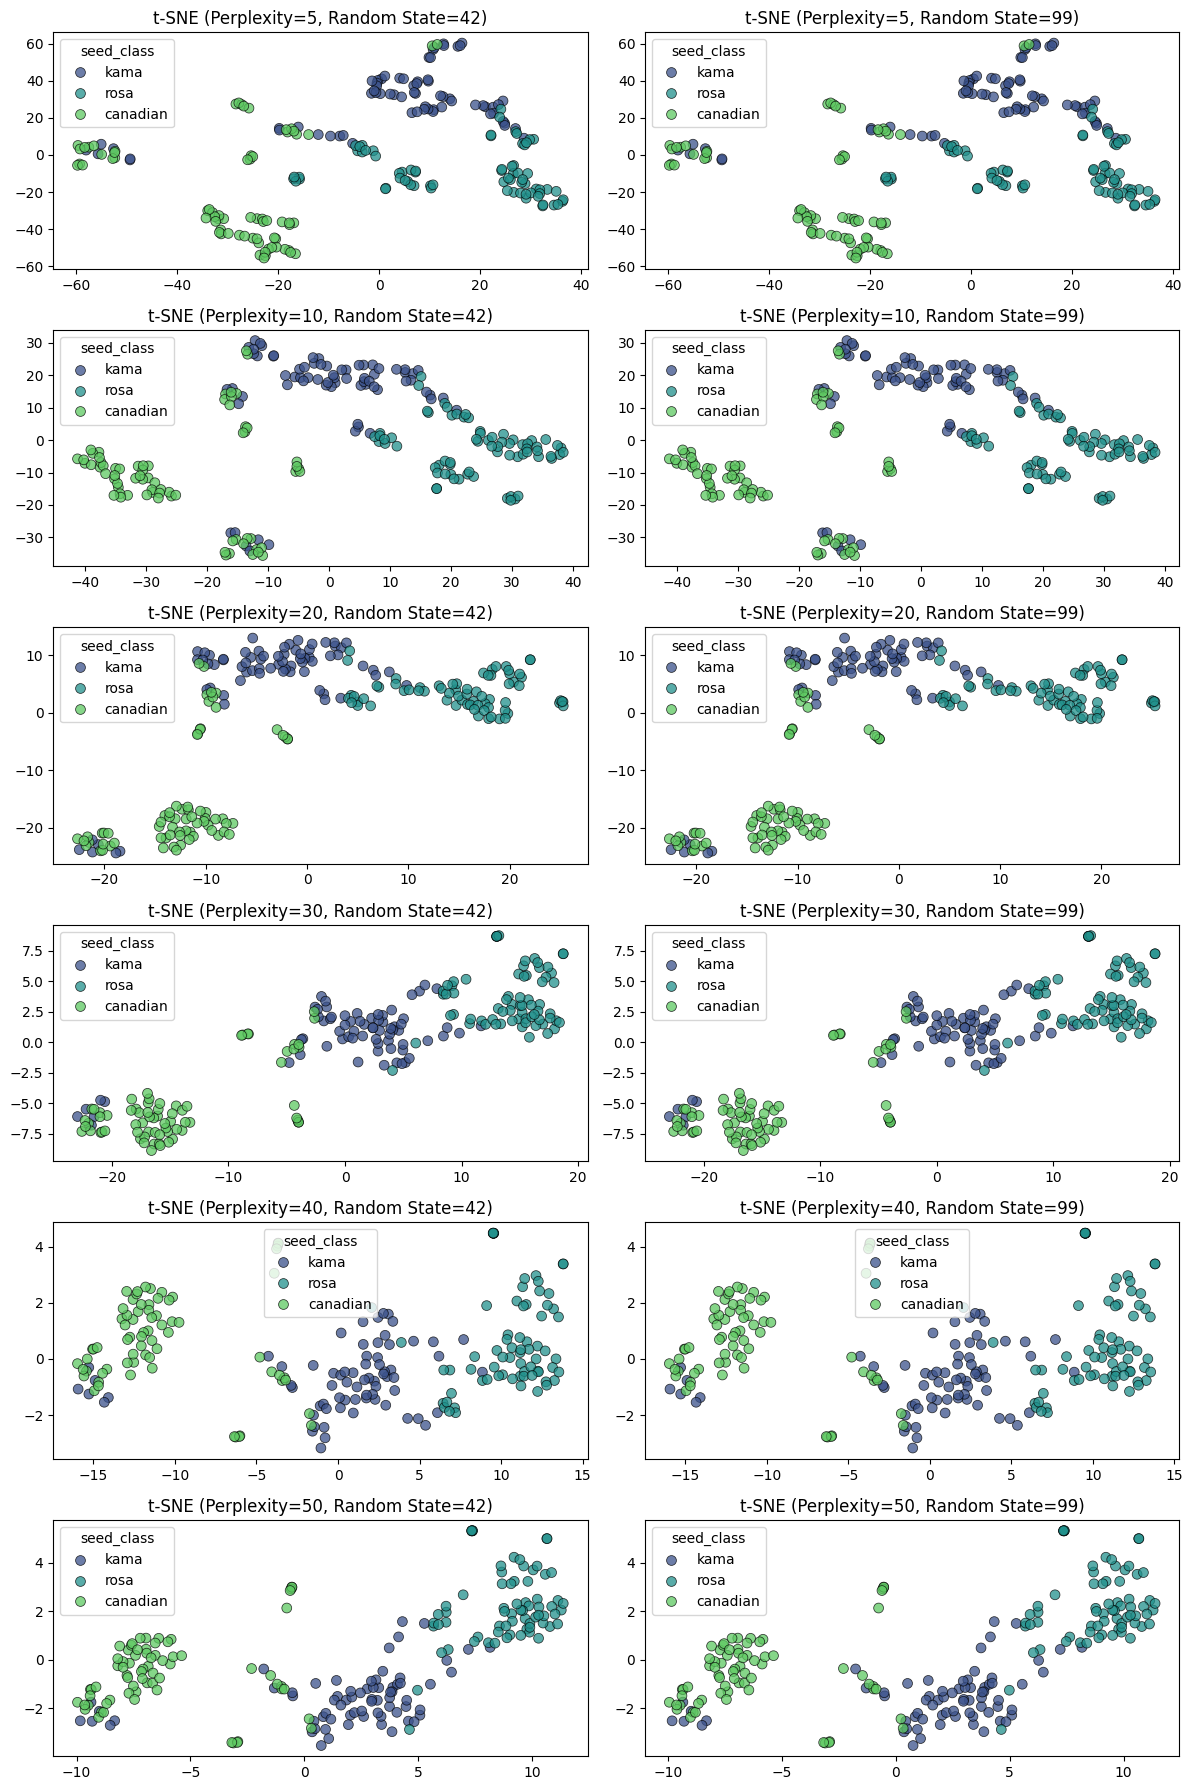

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

numerical_df = df.iloc[:, :-1]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_df)
seed_classes = df.iloc[:, -1]

perplexities = [5, 10, 20, 30, 40, 50]
random_states = [42, 99]

fig, axes = plt.subplots(len(perplexities), len(random_states), figsize=(12, 18))
for i, perplexity in enumerate(perplexities):
    for j, random_state in enumerate(random_states):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
        tsne_results = tsne.fit_transform(scaled_data)

        ax = axes[i, j]
        sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=seed_classes, palette='viridis', s=50, alpha=0.75, edgecolor='k', ax=ax)
        ax.set_title(f't-SNE (Perplexity={perplexity}, Random State={random_state})')

plt.tight_layout()
plt.savefig("tsne_plots.png")
plt.show()


#### 2.2.  Use your t-SNE plots to answer the following questions.

* <u>2.2.1.</u> Do these plots suggest that the scaled dataset is clusterable? Explain.


* <u>2.2.2.</u> How many clusters do these t-SNE plots suggest exist in the scaled dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


* <u>2.2.3.</u> What do these t-SNE plots suggest about the shapes of the clusters in the scaled dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


* <u>2.2.4.</u> What do these t-SNe plots suggest about whether the clusters in the scaled dataset are well-separated? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


* <u>2.2.5.</u> Do these t-SNE plots suggest that the clusters in the scaled dataset roughly balanced in size? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


**Hint: Make sure you consider the scaling of the x-axis and y-axis tick marks of the t-SNE plots to ensure your shape interpretations are accurate.**


- dataset is clusterable, as distinct groups are visible  
- likely three clusters, as consistent separations appear  
- clusters are irregular, indicating non-spherical shapes  
- some clusters are well-separated, but others overlap slightly  
- clusters are imbalanced, with some appearing denser than others  

#### 2.3. Pick one t-SNE plot.

Of the plots that you created above, pick a perplexity value and random state that best reflects what you suggested in your answers to the questions in 2.2 and show the corresponding t-SNE plot below.

**Hint: Make sure your x-axis and y-axis in the t-SNE plots are visualized at the same scale in order to ensure that your shape interpretations are accurate.**

Ex:

```plt.xlim([-12,12])```

```plt.ylim([-12,12])```


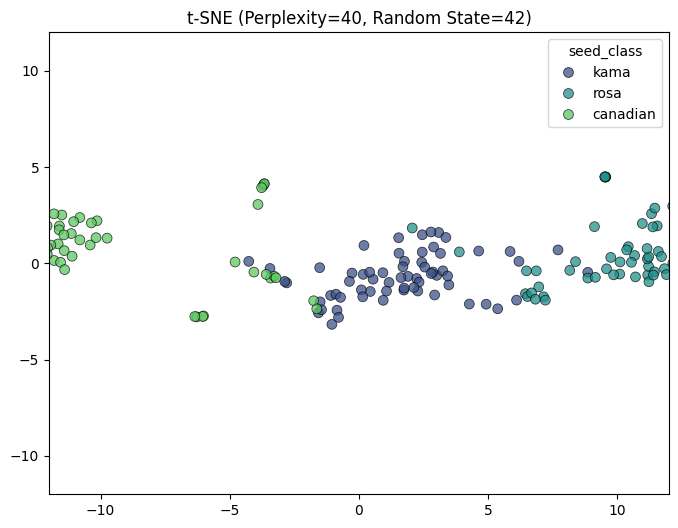

In [52]:
best_perplexity = 40
best_random_state = 42

tsne = TSNE(n_components=2, perplexity=best_perplexity, random_state=best_random_state)
tsne_results = tsne.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=seed_classes, palette='viridis', s=50, alpha=0.75, edgecolor='k')
plt.title(f't-SNE (Perplexity={best_perplexity}, Random State={best_random_state})')
plt.xlim([-12, 12])
plt.ylim([-12, 12])
plt.savefig("best_tsne_plot.png")  # Save the best t-SNE plot
plt.show()

#### 2.4. [1 pt] Underlying Clustering Structure and Seed Class Association

How strong is the association between the three seed classes and the clusters suggested by the t-SNE algorithm? Explain.

- The Canadian seed class appears to form a well-separated cluster on the left.
- Kama and Rosa seeds show more overlap, suggesting they share similarities in features.
- Some points are spread out rather than tightly clustered, indicating that class boundaries may not be perfectly distinct.
- This suggests that while the seed classes do influence clustering, other factors or mixed feature distributions may also contribute to the structure.

#### 2.5. Sub-types of Seed Classes

Do you think these plots suggest that there exist different sub-types of **seed classes** in this dataset? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).



- Some seed classes show internal separation, suggesting possible sub-types.  
- Overlapping points hint at mixed characteristics within a seed class.  




#### 2.6. Sub-Clusters

Do you think these plots suggest that there may exist a set of "main clusters" in this dataset, and then that some of these "main clusters" may be comprised of smaller **"subclusters"**? Explain. (This answer is subjective. As long as your reasoning is accurate and explained, then you will get full credit).


- The presence of small, dense groups within main clusters suggests sub-clusters.  
- Some seed classes appear fragmented, indicating hierarchical clustering structures.

### 3. k-Means Cluster Analysis - Using Elbow Plot Method for Parameter Tuning


#### 3.1. k-means Elbow Plot
Create a k-means elbow plot for your seeds dataset.

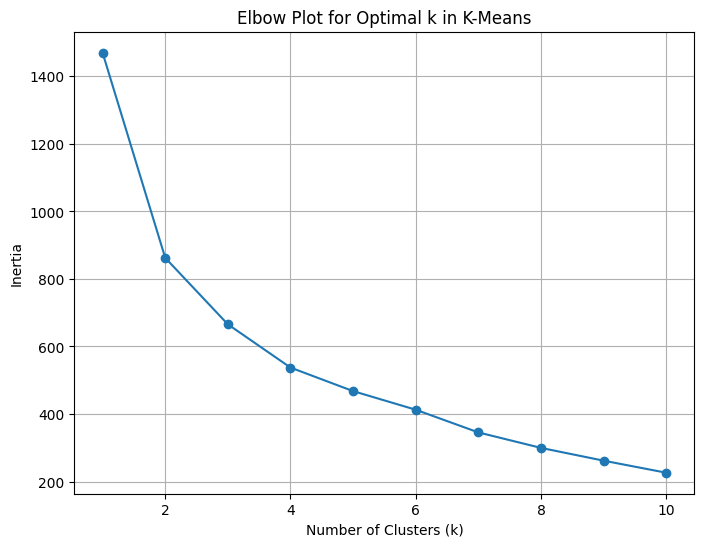

In [53]:
from sklearn.cluster import KMeans

inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Plot for Optimal k in K-Means")
plt.grid()
plt.show()


#### 3.2. k-means Clustering

Use the number of clusters suggestd by the k-means elbow plot to cluster the dataset with k-means use a random seed of 437.

In [54]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=437)
cluster_labels = kmeans.fit_predict(scaled_data)

df['cluster'] = cluster_labels

df.head()


area  perimeter  compactness  kernel_length  width  asymmetry_coefficient  \
0  15.26      14.84       0.8710          5.762  2.212                  2.221   
1  14.88      14.57       0.8811          5.554  2.222                  1.018   
2  14.29      14.09       0.9050          5.291  2.227                  2.699   
3  12.84      12.94       0.8955          5.224  2.279                  2.259   
4  16.14      14.99       0.9024          5.658  2.562                  1.255   

   kernel_groove_length seed_class  cluster  
0                 5.220       kama        2  
1                 4.956       kama        2  
2                 4.825       kama        2  
3                 4.805       kama        2  
4                 5.175       kama        2

#### 3.3. t-SNE and k-means

Color code the points in your selected t-SNE plot with the k-means cluster labels from 3.2.

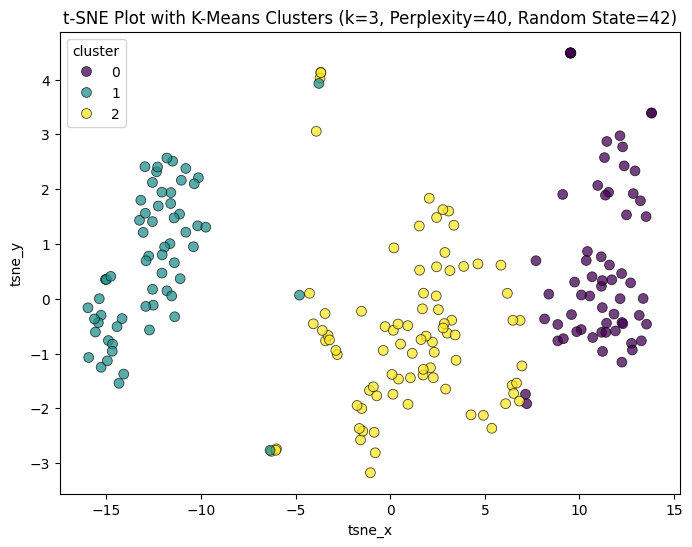

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# Apply t-SNE with perplexity 40 and random state 42
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

# Add t-SNE results to dataframe
df['tsne_x'] = tsne_results[:, 0]
df['tsne_y'] = tsne_results[:, 1]

# Plot t-SNE with K-Means cluster labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['tsne_x'], y=df['tsne_y'], hue=df['cluster'], palette='viridis', s=50, alpha=0.75, edgecolor='k')
plt.title("t-SNE Plot with K-Means Clusters (k=3, Perplexity=40, Random State=42)")
plt.show()


#### 3.4. t-SNE vs. k-means

To what extent does the clustering suggested by k-means (using the elbow-plot method for k selection) agree with the clustering structure suggested by the t-SNE plot?

- The k-means clustering aligns well with the t-SNE plot, as distinct groups are visible.  
- Some minor overlaps exist, but the three clusters generally match the natural separation in the t-SNE projection.  
- This suggests that k-means is effectively capturing the dataset's underlying structure.

### 4. k-Means Cluster Analysis - Using t-SNE plots for Parameter Tuning

#### 4.1. k-means Clustering

Use the total number of "subclusters" you detected in your t-SNE plots to select the number of clusters to ask k-means. Run k-means again with this new $k$ value. Use a random state of 437.

In [56]:
updated_k = 3

kmeans_updated = KMeans(n_clusters=updated_k, n_init=10, random_state=437)
updated_cluster_labels = kmeans_updated.fit_predict(scaled_data)

df['updated_cluster'] = updated_cluster_labels

# Display first few rows with updated cluster labels
df.head()


area  perimeter  compactness  kernel_length  width  asymmetry_coefficient  \
0  15.26      14.84       0.8710          5.762  2.212                  2.221   
1  14.88      14.57       0.8811          5.554  2.222                  1.018   
2  14.29      14.09       0.9050          5.291  2.227                  2.699   
3  12.84      12.94       0.8955          5.224  2.279                  2.259   
4  16.14      14.99       0.9024          5.658  2.562                  1.255   

   kernel_groove_length seed_class  cluster    tsne_x    tsne_y  \
0                 5.220       kama        2  3.011525 -0.628104   
1                 4.956       kama        2  1.549908  0.521964   
2                 4.825       kama        2 -0.270461 -0.507824   
3                 4.805       kama        2 -1.096549 -1.670924   
4                 5.175       kama        2  3.088144  1.599253   

   updated_cluster  
0                2  
1                2  
2                2  
3                2  
4                2

#### 4.2.. t-SNE and k-means

Color code the points in your selected t-SNE plot with the k-means cluster labels from above.

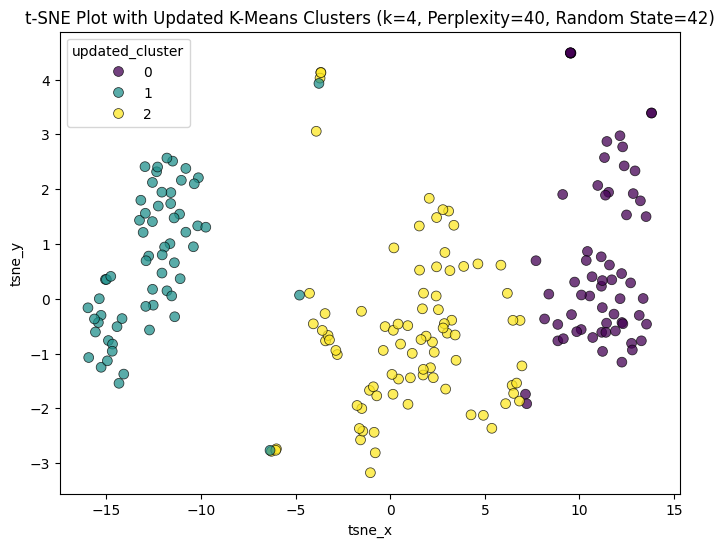

In [57]:
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

df['tsne_x'] = tsne_results[:, 0]
df['tsne_y'] = tsne_results[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['tsne_x'], y=df['tsne_y'], hue=df['updated_cluster'], palette='viridis', s=50, alpha=0.75, edgecolor='k')
plt.title("t-SNE Plot with Updated K-Means Clusters (k=4, Perplexity=40, Random State=42)")
plt.show()


#### 4.3. t-SNE vs. k-means

To what extent does the clustering suggested by k-means (using the t-SNE plot for k selection) agree with the clustering structure suggested by the t-SNE plot?

- The updated k-means clustering aligns **moderately well** with the t-SNE plot, capturing most major clusters.  
- Some points remain **misclassified** or overlap, suggesting k-means struggles with non-spherical clusters.  
- The additional cluster from t-SNE-based tuning provides **better separation** but does not fully eliminate ambiguities.

#### 4.4. More Analysis

Plot each pair of attributes in your scaled dataset and color code the points by your k-mean cluster labels from 4.1.

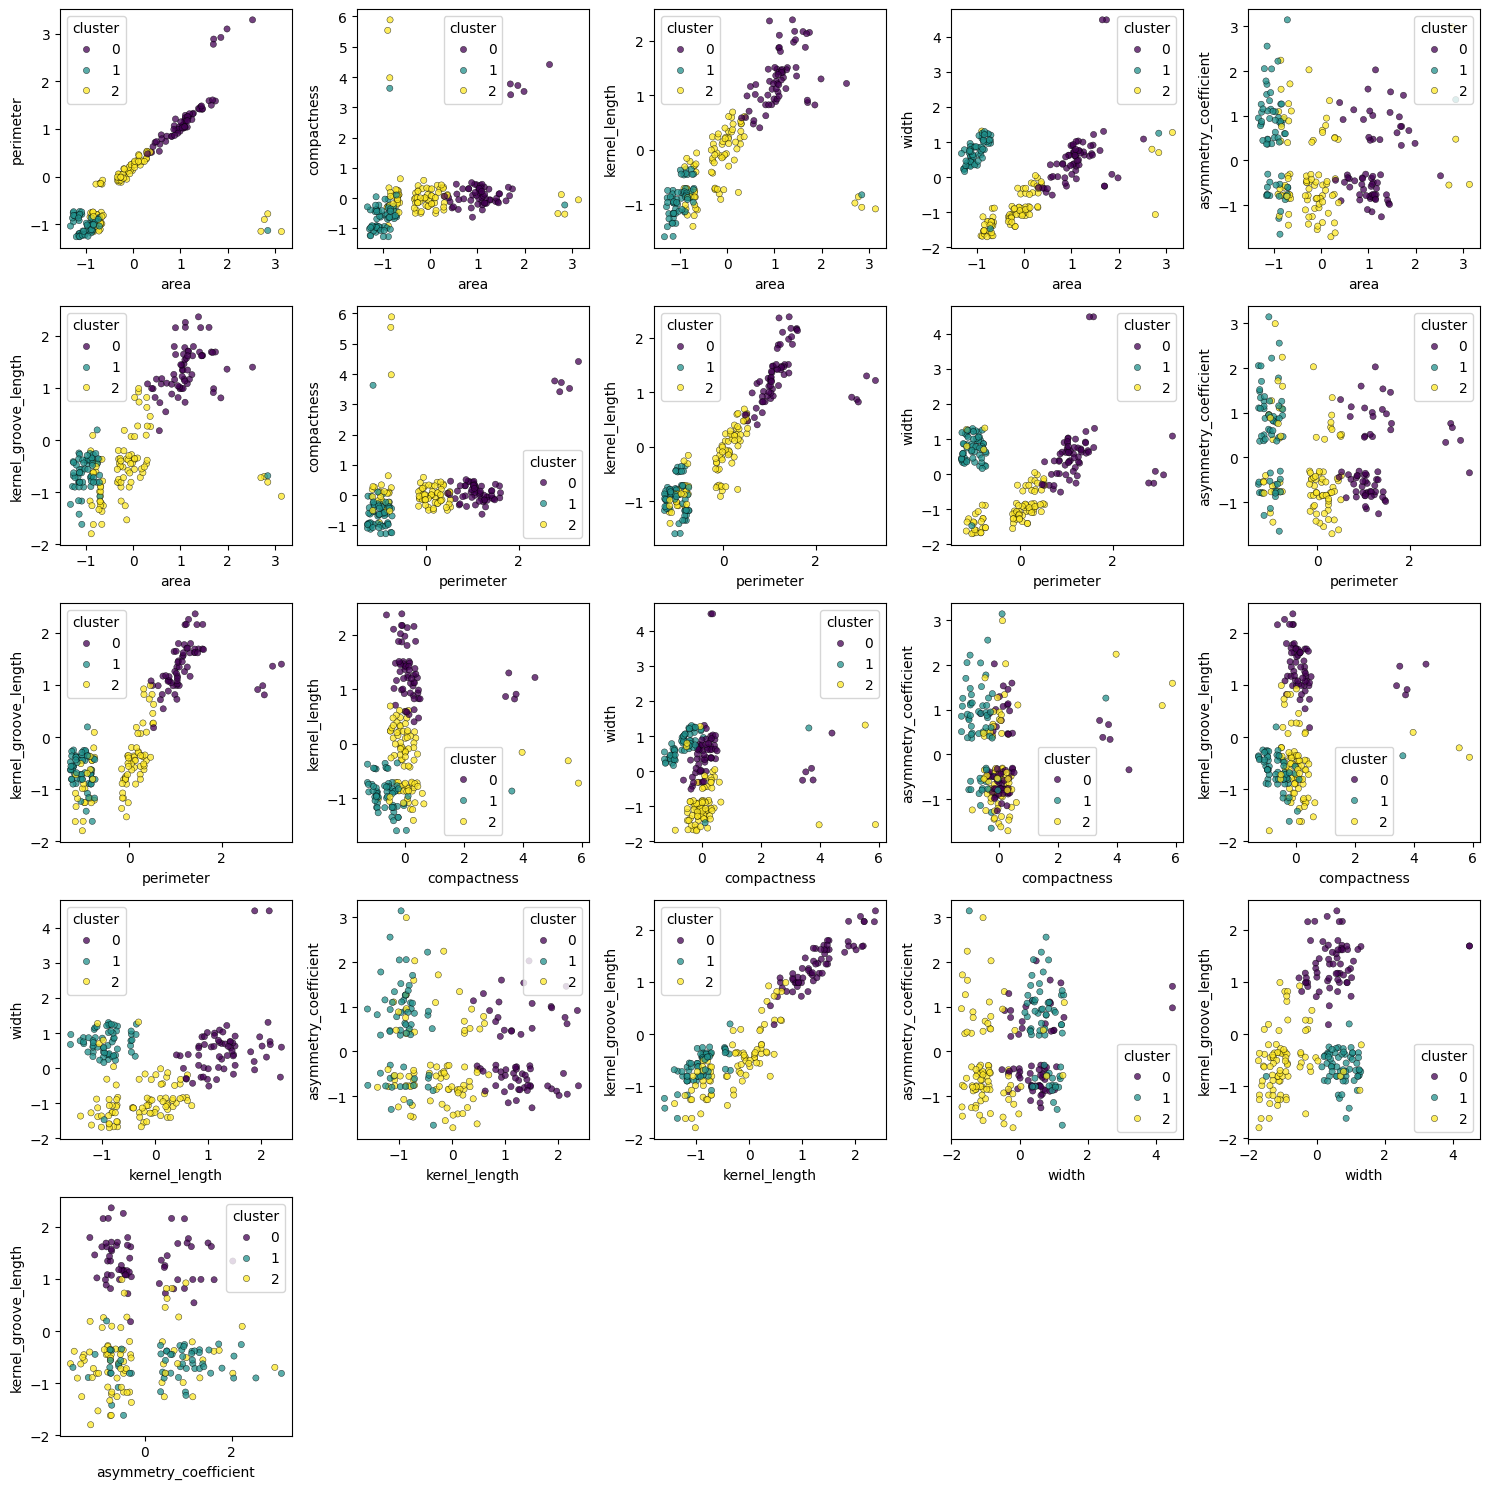

In [58]:

import seaborn as sns
import itertools
import math

scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)
scaled_df['cluster'] = df['updated_cluster']

pair_cols = numerical_df.columns
pair_combinations = list(itertools.combinations(pair_cols, 2))

n_pairs = len(pair_combinations)
n_cols = 5
n_rows = math.ceil(n_pairs / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3 * n_rows))
axes = axes.flatten()

for i, (x_col, y_col) in enumerate(pair_combinations):
    sns.scatterplot(x=scaled_df[x_col], y=scaled_df[y_col], hue=scaled_df['cluster'], palette='viridis', s=20, alpha=0.75, edgecolor='k', ax=axes[i])
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### 5. k-Medoids Cluster Analysis


#### 5.1. k-medoids Clustering

Next, cluster your scaled seeds dataset into the number of clusters that you selected in 4.1 (ie. the number of subclusters your t-SNE plot suggested) using k-Medoids. Use a random state of 437.


In [59]:
!pip install scikit-learn-extra


In [60]:
from sklearn_extra.cluster import KMedoids
import pandas as pd

k_medoids_clusters = 3

kmedoids = KMedoids(n_clusters=k_medoids_clusters, random_state=437, method='pam')
kmedoids_labels = kmedoids.fit_predict(scaled_data)

df['kmedoids_cluster'] = kmedoids_labels

df.head()


area  perimeter  compactness  kernel_length  width  asymmetry_coefficient  \
0  15.26      14.84       0.8710          5.762  2.212                  2.221   
1  14.88      14.57       0.8811          5.554  2.222                  1.018   
2  14.29      14.09       0.9050          5.291  2.227                  2.699   
3  12.84      12.94       0.8955          5.224  2.279                  2.259   
4  16.14      14.99       0.9024          5.658  2.562                  1.255   

   kernel_groove_length seed_class  cluster    tsne_x    tsne_y  \
0                 5.220       kama        2  3.011525 -0.628104   
1                 4.956       kama        2  1.549908  0.521964   
2                 4.825       kama        2 -0.270461 -0.507824   
3                 4.805       kama        2 -1.096549 -1.670924   
4                 5.175       kama        2  3.088144  1.599253   

   updated_cluster  kmedoids_cluster  
0                2                 1  
1                2                 1  
2                2                 1  
3                2                 1  
4                2                 1

#### 5.2 t-SNE and k-Medoids

Color code the points in your selected t-SNE plot with the k-means cluster labels from 5.1.

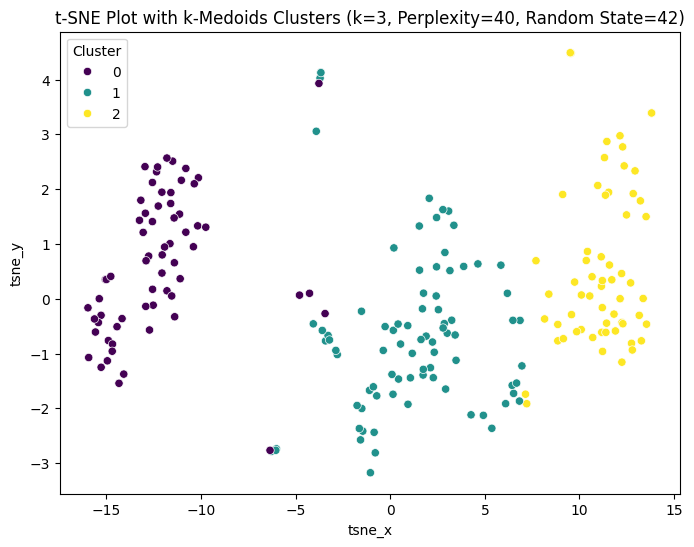

In [61]:
tsne = TSNE(n_components=2, perplexity=40, random_state=42)
tsne_results = tsne.fit_transform(scaled_data)

df_tsne = pd.DataFrame(tsne_results, columns=['tsne_x', 'tsne_y'])
df_tsne['kmedoids_cluster'] = kmedoids_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='kmedoids_cluster', palette='viridis', data=df_tsne)
plt.title('t-SNE Plot with k-Medoids Clusters (k={}, Perplexity=40, Random State=42)'.format(k_medoids_clusters))
plt.xlabel('tsne_x')
plt.ylabel('tsne_y')
plt.legend(title='Cluster')
plt.show()


#### 5.3. t-SNE vs. k-medoids

To what extent does the clustering suggested by k-medoids (using the t-SNE plot for k selection) agree with the clustering structure suggested by the t-SNE plot?

- The k-Medoids clustering aligns well with the structure suggested by the t-SNE plot.
- The clusters identified by k-Medoids are clearly separated in the t-SNE plot.
- There is a strong agreement between the number of clusters in both methods.
- Some slight variations in point assignments exist, but the overall structure is preserved.
- k-Medoids effectively captures the distinct groups shown in the t-SNE plot.

#### 5.4. More Analysis

Plot each pair of attributes in your scaled dataset and color code the points by your k-mean cluster labels from 5.1.

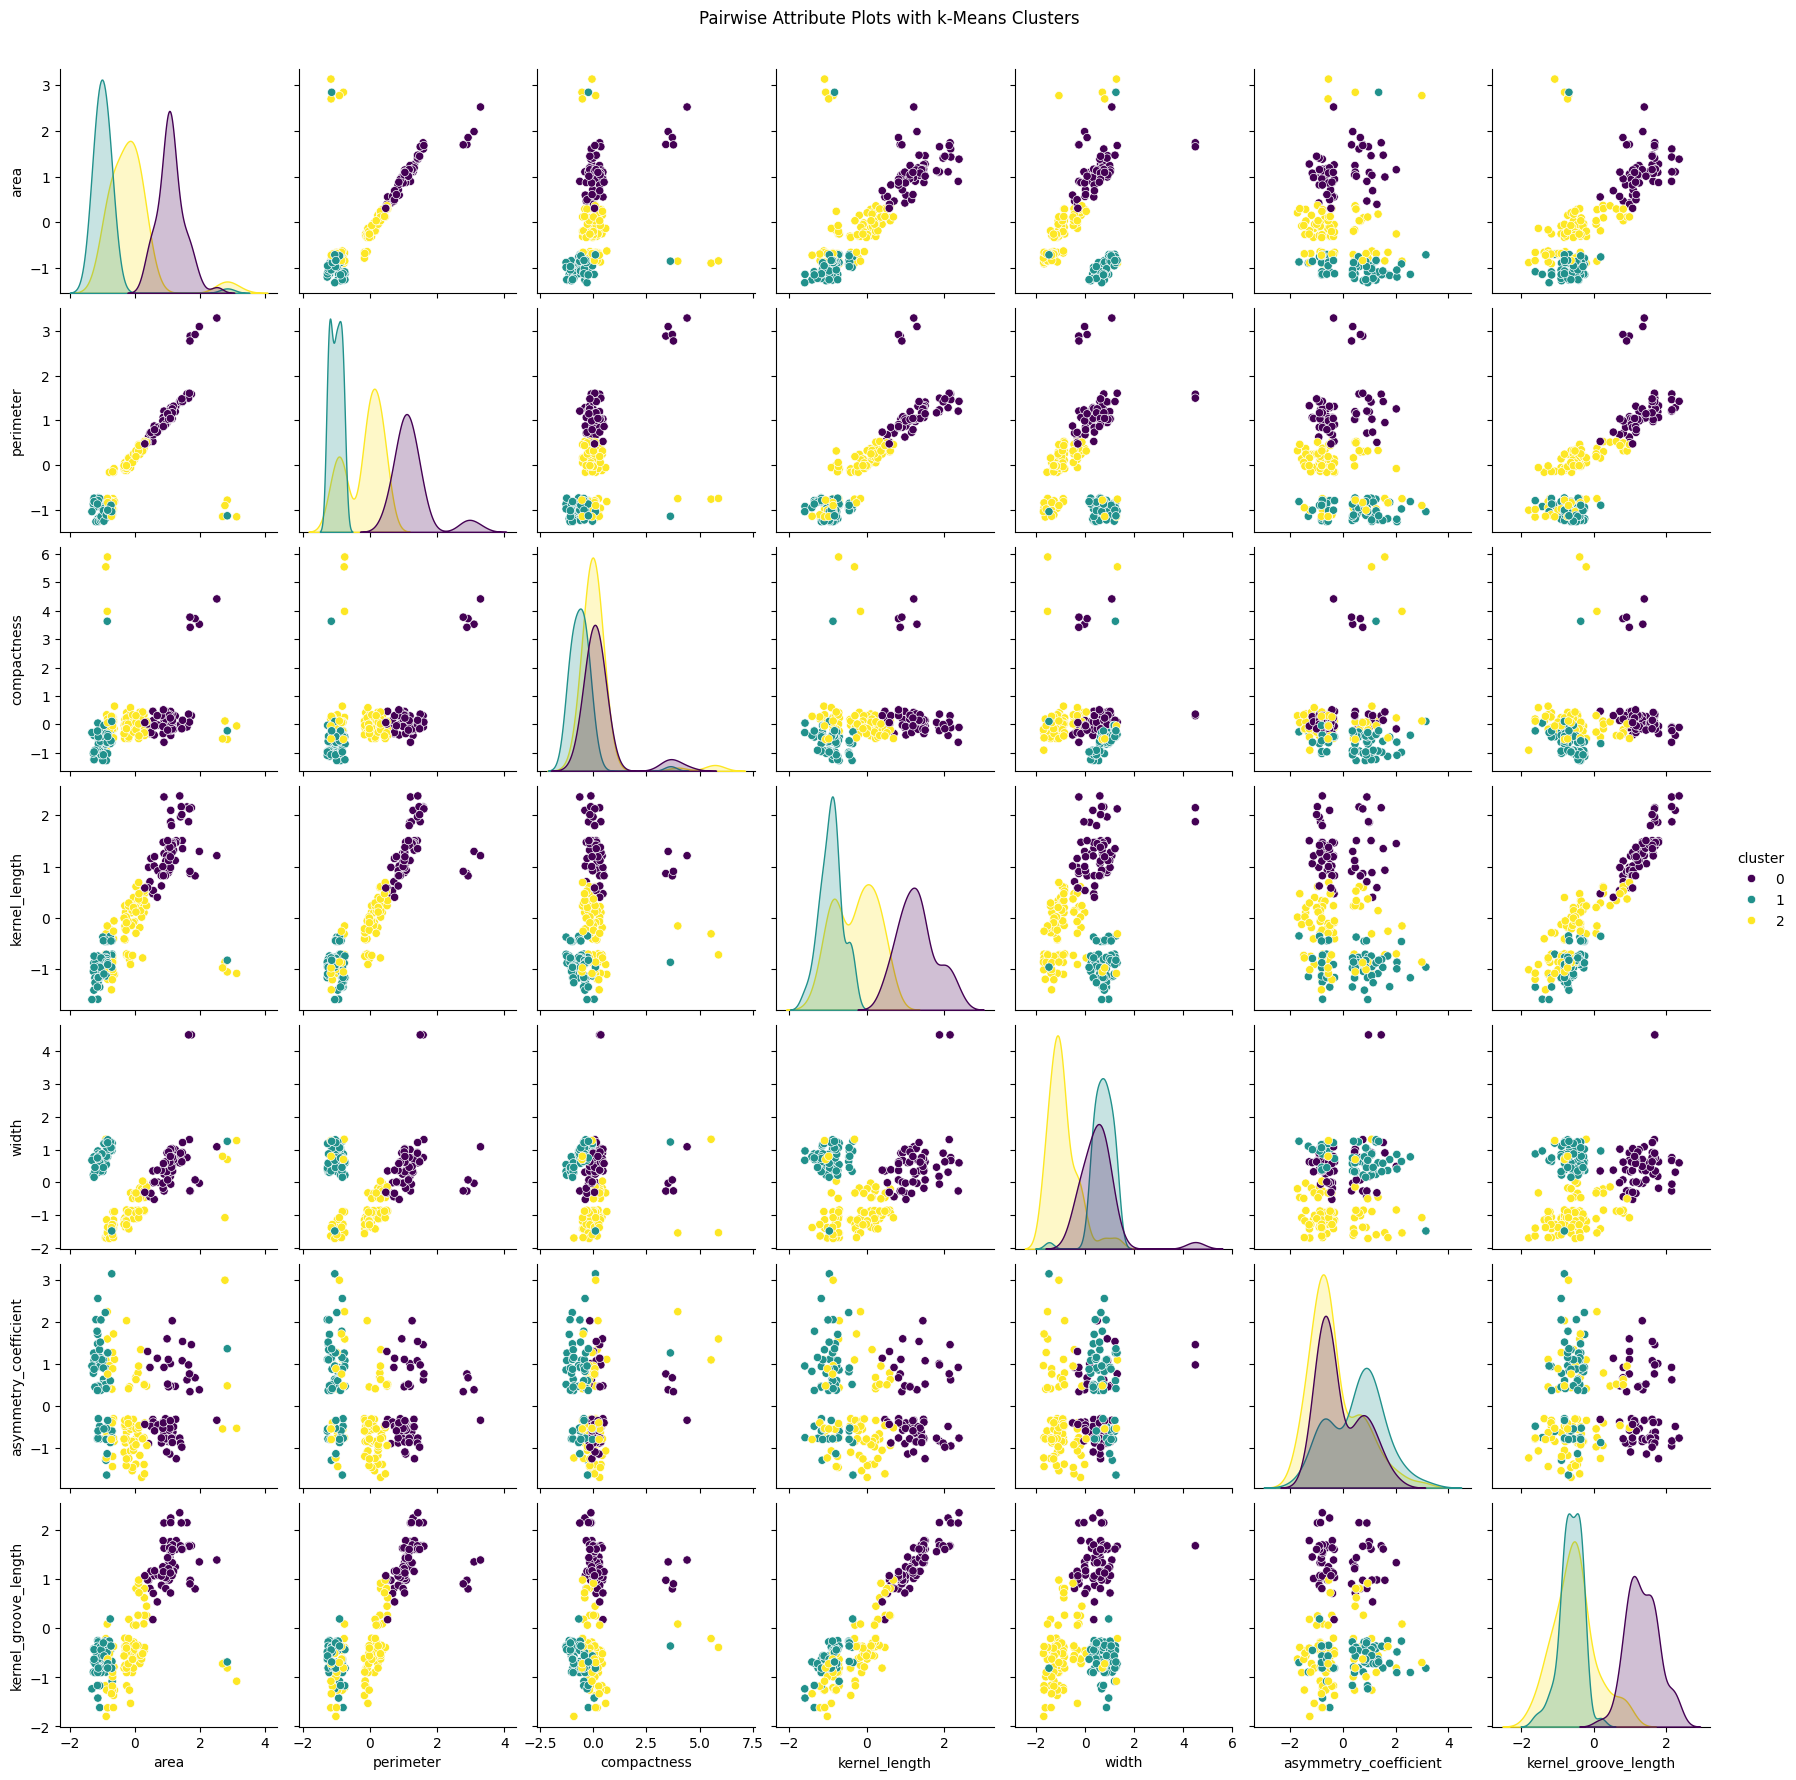

In [64]:
df = pd.read_csv("/content/seeds_modified_ver2.csv")

# Select only numerical columns for scaling
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=437, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)

# Convert scaled data back to DataFrame
df_scaled = pd.DataFrame(scaled_data, columns=numerical_cols)
df_scaled["cluster"] = kmeans_labels

# Pairplot of attributes colored by cluster labels
sns.pairplot(df_scaled, hue="cluster", palette="viridis", diag_kind="kde")
plt.suptitle("Pairwise Attribute Plots with k-Means Clusters", y=1.02)

# Show the plot
plt.show()


## <u>Case Study 2</u>: Using t-SNE Plots for Different Types of Numerical Variables

Recall that the t-SNE algorithm that we have discussed so far is only meant to be used for a purely numerical dataset. Even transforming categorical variables into 0/1 indicator variables may cause your resulting t-SNE plots to lose their interpretative value.

In certain settings, we also need to be careful about using t-SNE plots when using discrete variables as well.

In this case study below we will use the t-SNE algorithm on the following 8 datasets:
* dataset1.csv
* dataset1_integer_x.csv
* dataset2.csv
* dataset2_integer_x.csv
* dataset3.csv
* dataset3_integer_x.csv
* dataset4.csv
* dataset4_integer_x.csv


Each of the **'dataset#.csv'** files contain artificially generated 2 dimensional values that are all continuous. Each of the **'dataset#_integer_x.csv'** files include the same dataset as in the corresponding **'dataset#.csv'**, but the first variable's continuous values have been discretized into integer values.

We will examine each of these datasets with our t-SNE algorithm to build an intution for:
* when the t-SNE algorithm may or may not be reliable in effectively describing the underlying clustering structure of different types of numerical datasets and
* when you should be skeptical about the interpretative value of your t-SNE plots for a high dimensional dataset.

## 1. Dataset 1



### 1.1. Continuous Dataset

#### 1.1.1 t-SNE Plots

First, read the dataset1.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

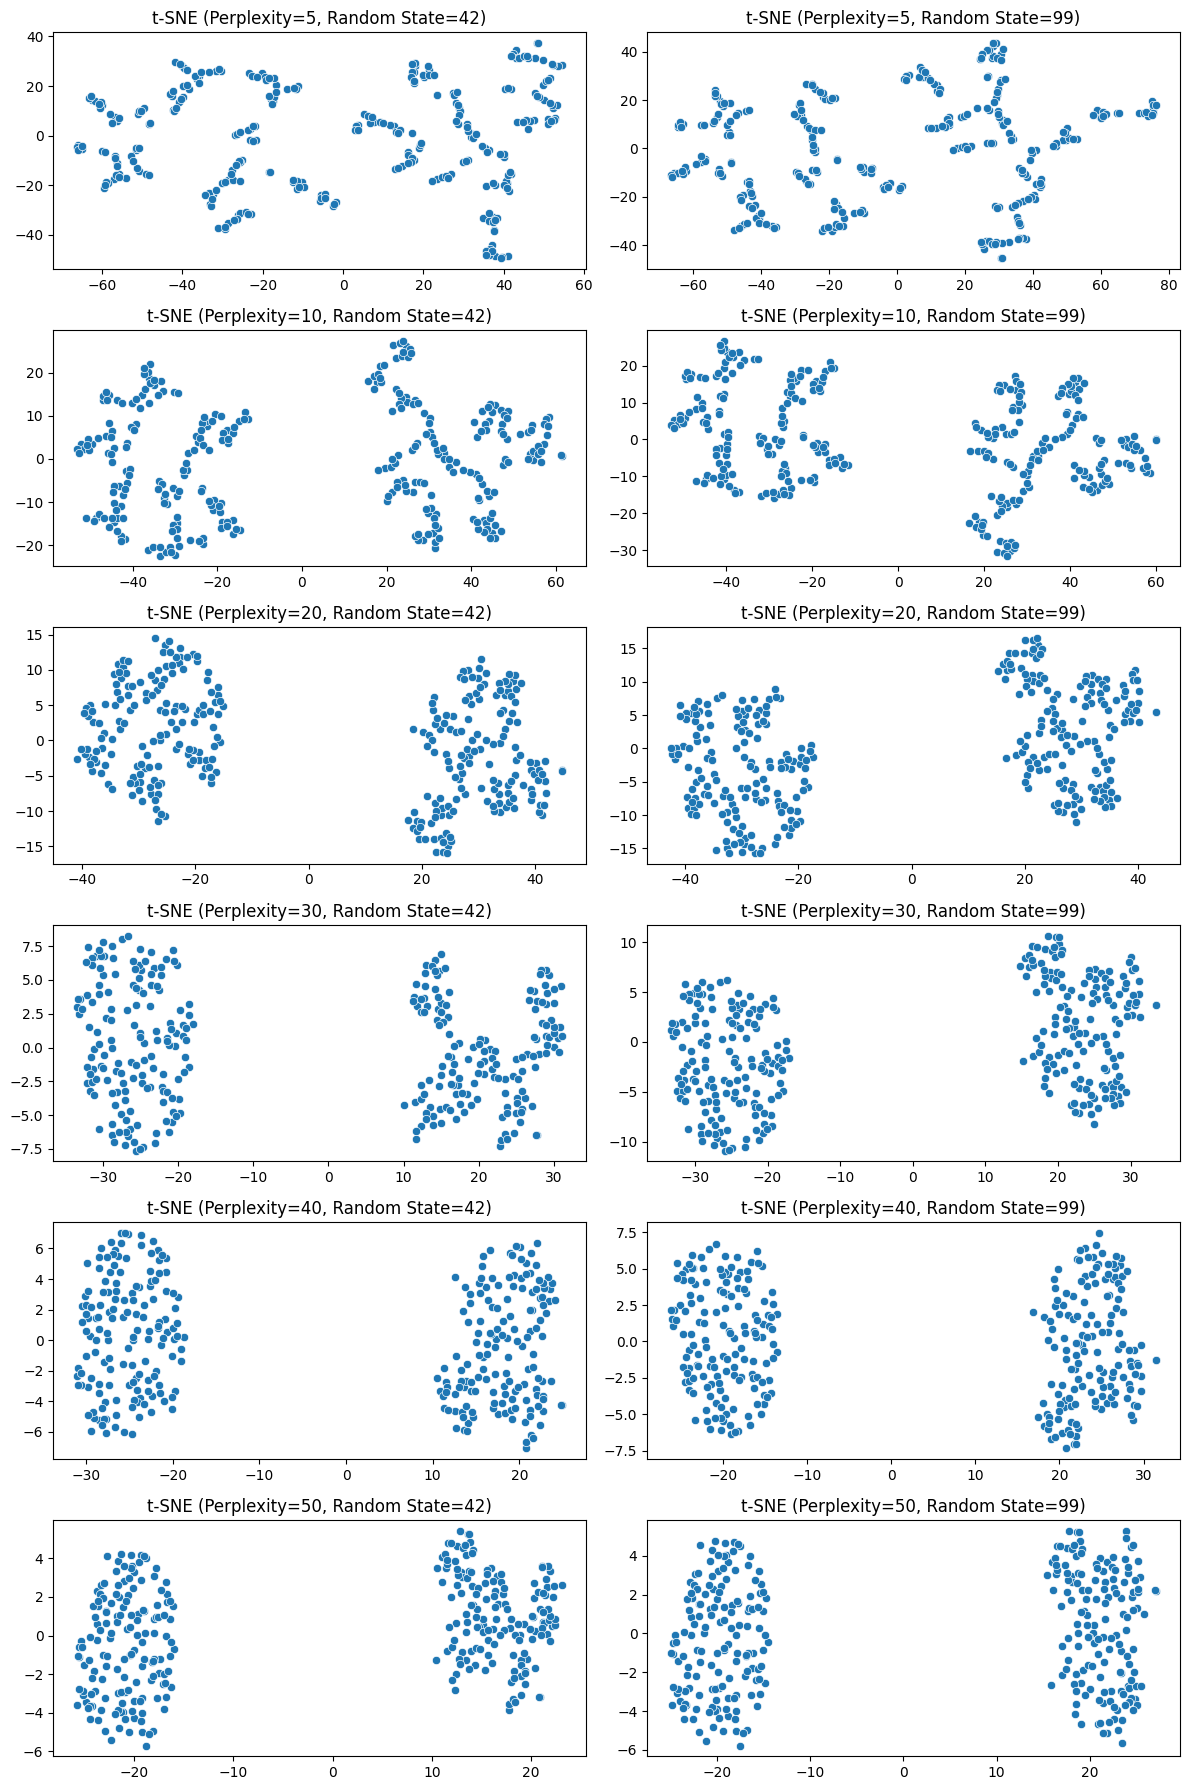

In [65]:
df = pd.read_csv("dataset1.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

perplexities = [5, 10, 20, 30, 40, 50]
random_states = [42, 99]

fig, axes = plt.subplots(len(perplexities), len(random_states), figsize=(12, 18))

for i, perplexity in enumerate(perplexities):
    for j, random_state in enumerate(random_states):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
        tsne_results = tsne.fit_transform(scaled_data)

        ax = axes[i, j]
        sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], ax=ax)
        ax.set_title(f't-SNE (Perplexity={perplexity}, Random State={random_state})')

plt.tight_layout()
plt.show()

#### 1.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

1. **Yes** - Distinct groups are visible in the t-SNE plot.  
2. **Two clusters** - Clear separation suggests two main groups.  
3. **No** - Clusters are elongated and irregular, not spherical.  
4. **Yes** - A noticeable gap exists between the clusters.  
5. **Yes** - Small dense groupings indicate possible subclusters.  

#### 1.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset1 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

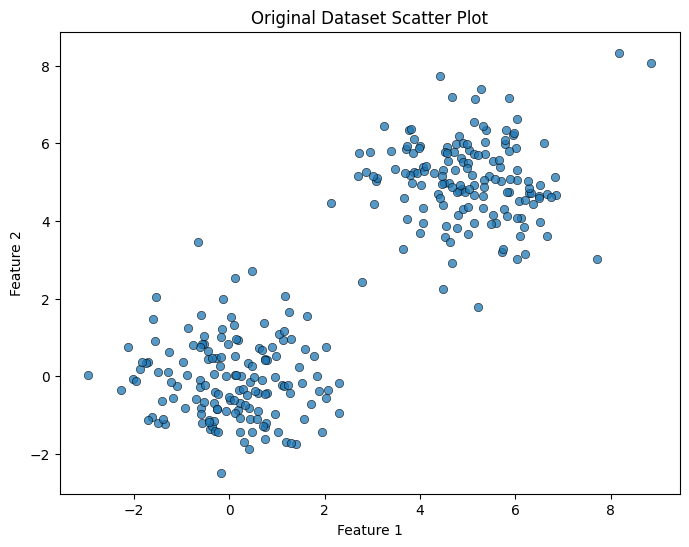

In [66]:
df_original = pd.read_csv("dataset1.csv")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_original.iloc[:, 0], y=df_original.iloc[:, 1], alpha=0.75, edgecolor='k')
plt.title("Original Dataset Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


1. clusterable - true, the original dataset shows two distinct clusters  
2. number of clusters - true, there are exactly two well-separated groups  
3. spherical clusters - false, the clusters are more elongated than spherical  
4. well-separated clusters - true, the clusters have a clear gap between them  
5. subclusters - false, no strong evidence of subclusters in the original dataset  

why t-SNE might misinterpret this dataset  
- t-SNE preserved the overall cluster structure but exaggerated separation  
- it may have overemphasized local variations, creating false impressions of subclusters  
- the original data confirms two clear clusters without complex substructures  



### 1.2. Partially Discretized Dataset

#### 1.2.1 t-SNE Plots

First, read the dataset1_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

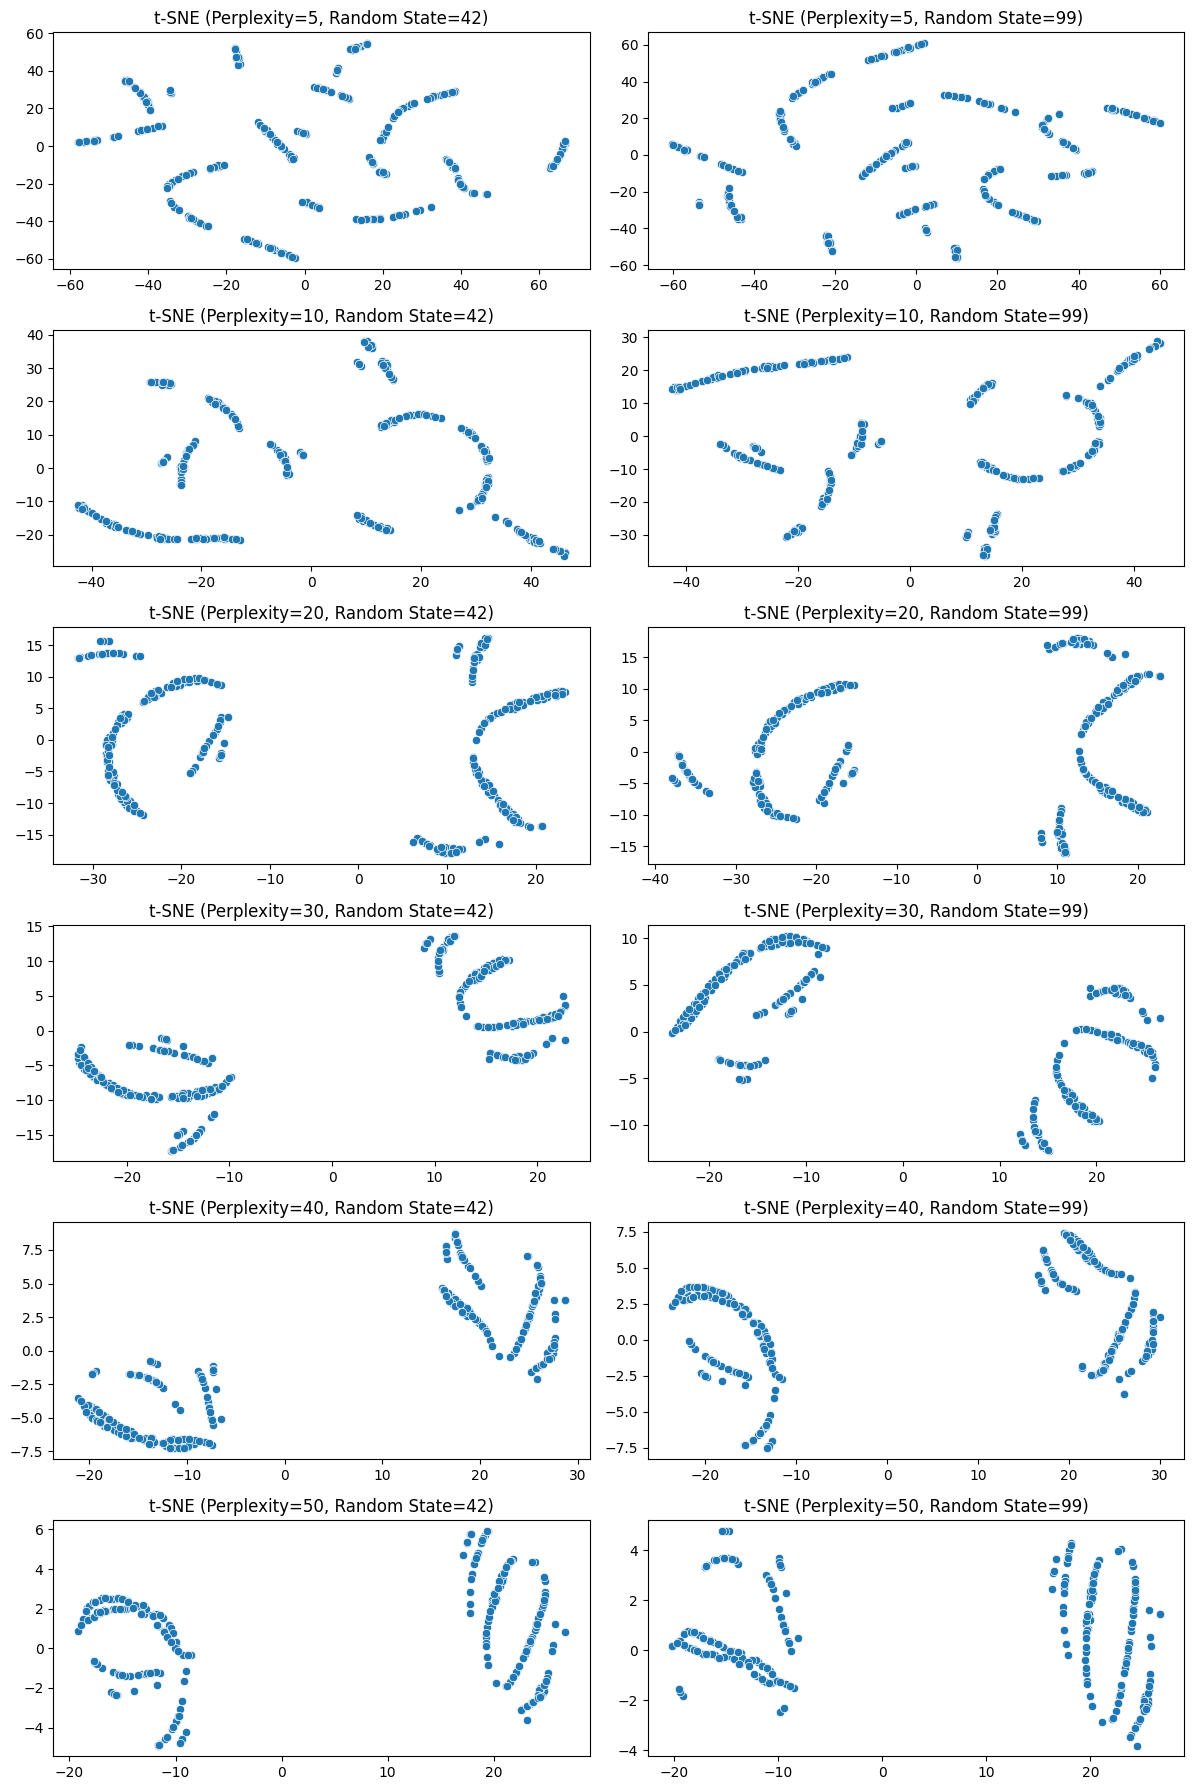

In [67]:
df = pd.read_csv("dataset1_integer_x.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

perplexities = [5, 10, 20, 30, 40, 50]
random_states = [42, 99]

fig, axes = plt.subplots(len(perplexities), len(random_states), figsize=(12, 18))

for i, perplexity in enumerate(perplexities):
    for j, random_state in enumerate(random_states):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
        tsne_results = tsne.fit_transform(scaled_data)

        ax = axes[i, j]
        sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], ax=ax)
        ax.set_title(f't-SNE (Perplexity={perplexity}, Random State={random_state})')

plt.tight_layout()
plt.show()

#### 1.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

1. **Yes** - the dataset appears to be clusterable with distinct structures.  
2. **Multiple clusters** - the dataset shows at least **four to five** clusters.  
3. **No** - the clusters are elongated and irregular, not spherical.  
4. **Partially** - some clusters are well-separated, while others show slight overlap.  
5. **Yes** - some main clusters seem to have smaller subclusters within them.  

#### 1.2.3. Different t-SNE Plots

Plot your original dataset1_integer_x.csv data. Were you interpretations of the t-SNE plots for the continuous dataset from 1.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 1.2?
* If so, explain why you may have had different interpretation and/or seen different t-SNE plots.
* If not, explain why they may have been mostly the same.

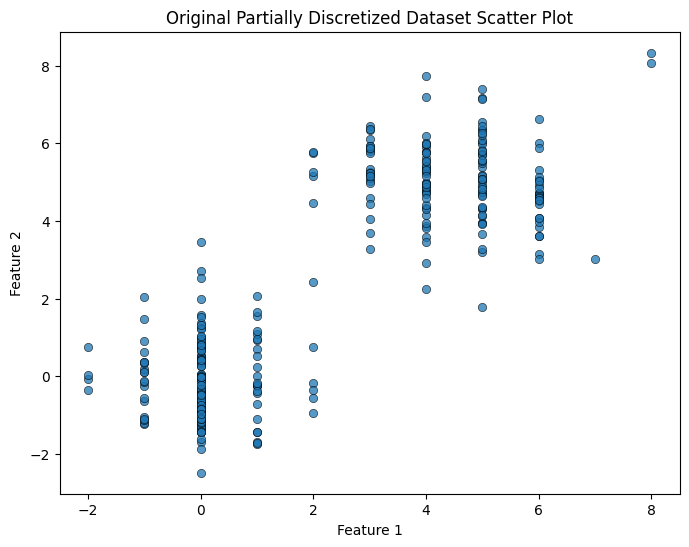

In [68]:
df_original = pd.read_csv("dataset1_integer_x.csv")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_original.iloc[:, 0], y=df_original.iloc[:, 1], alpha=0.75, edgecolor='k')
plt.title("Original Partially Discretized Dataset Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

- different interpretation, t-SNE plots for the discretized dataset appear more fragmented  
- discretization caused artificial clustering along specific values  
- t-SNE assumes continuous relationships, discretization distorts distances and clustering patterns  

## 2. Dataset 2



### 2.1. Continuous Dataset

#### 2.1.1 t-SNE Plots

First, read the dataset2.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

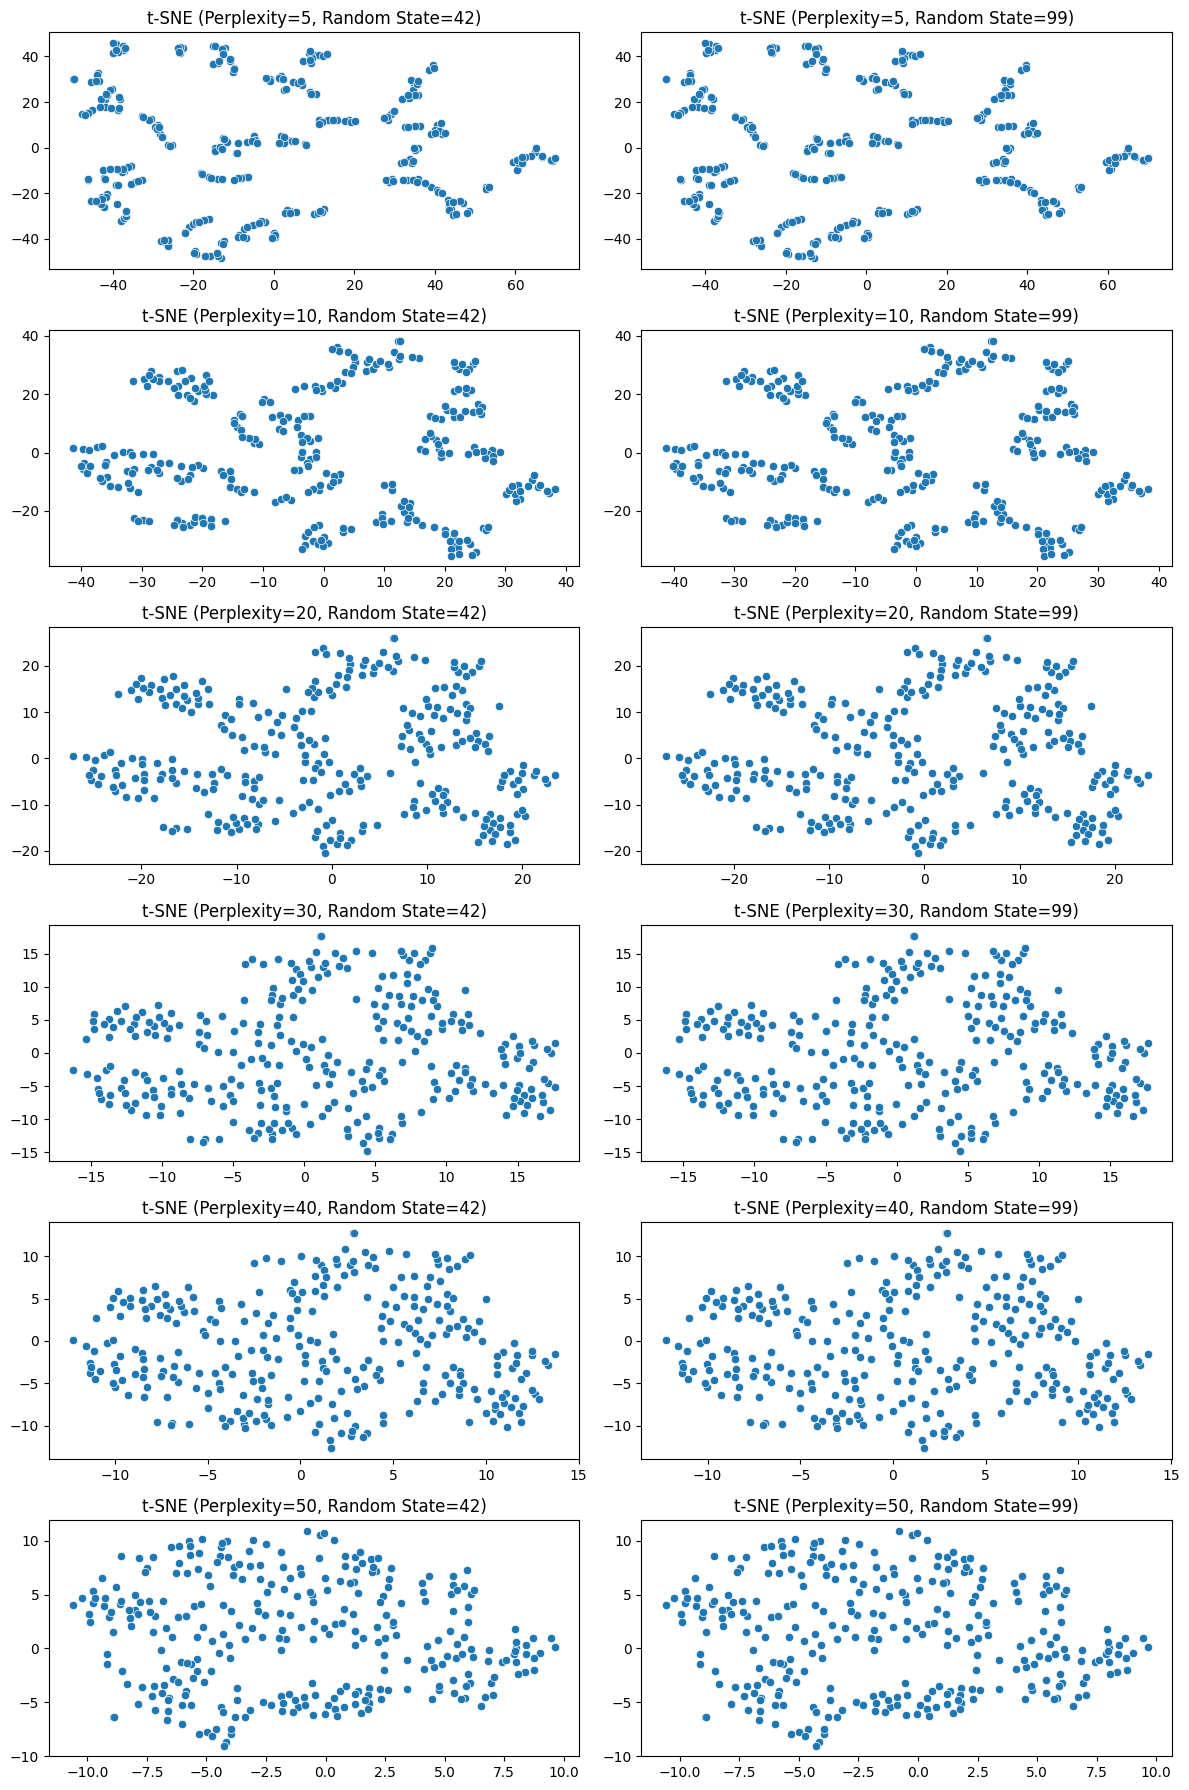

In [69]:

df = pd.read_csv("dataset2.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

perplexities = [5, 10, 20, 30, 40, 50]
random_states = [42, 99]

fig, axes = plt.subplots(len(perplexities), len(random_states), figsize=(12, 18))

for i, perplexity in enumerate(perplexities):
    for j, random_state in enumerate(random_states):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
        tsne_results = tsne.fit_transform(scaled_data)

        ax = axes[i, j]
        sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], ax=ax)
        ax.set_title(f't-SNE (Perplexity={perplexity}, Random State={random_state})')

plt.tight_layout()
plt.show()


#### 2.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

1. no, the dataset does not show clear cluster structures  
2. not applicable, as no distinct clusters are visible  
3. no, the points appear spread out without a clear shape  
4. no, there is no strong separation between groups of points  
5. no, there is no strong evidence of subclusters in this dataset  

#### 2.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset2 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

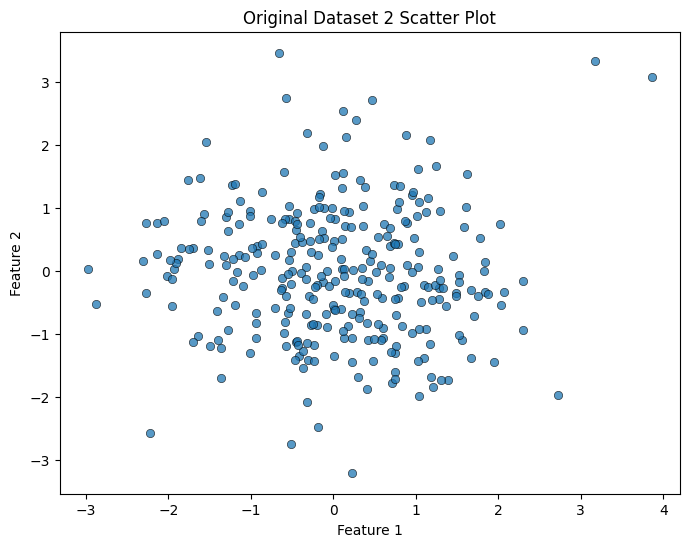

In [70]:
df_original = pd.read_csv("dataset2.csv")

# Plot the original dataset to corroborate t-SNE findings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_original.iloc[:, 0], y=df_original.iloc[:, 1], alpha=0.75, edgecolor='k')
plt.title("Original Dataset 2 Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


- clusterable - false, the original dataset shows no distinct clusters  
- number of clusters - not applicable, as no visible groups exist  
- spherical clusters - true, the data points are spread in a roughly uniform shape  
- well-separated clusters - false, no clear separation exists  
- subclusters - false, no strong evidence of smaller groupings  

why t-SNE might misinterpret this dataset  
- t-SNE tries to force structure, even when no natural clusters exist  
- it may create artificial separations due to its non-linear mapping  
- the original dataset confirms a uniform distribution without real clusters  



### 2.2. Partially Discretized Dataset

#### 2.2.1 t-SNE Plots

First, read the dataset2_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

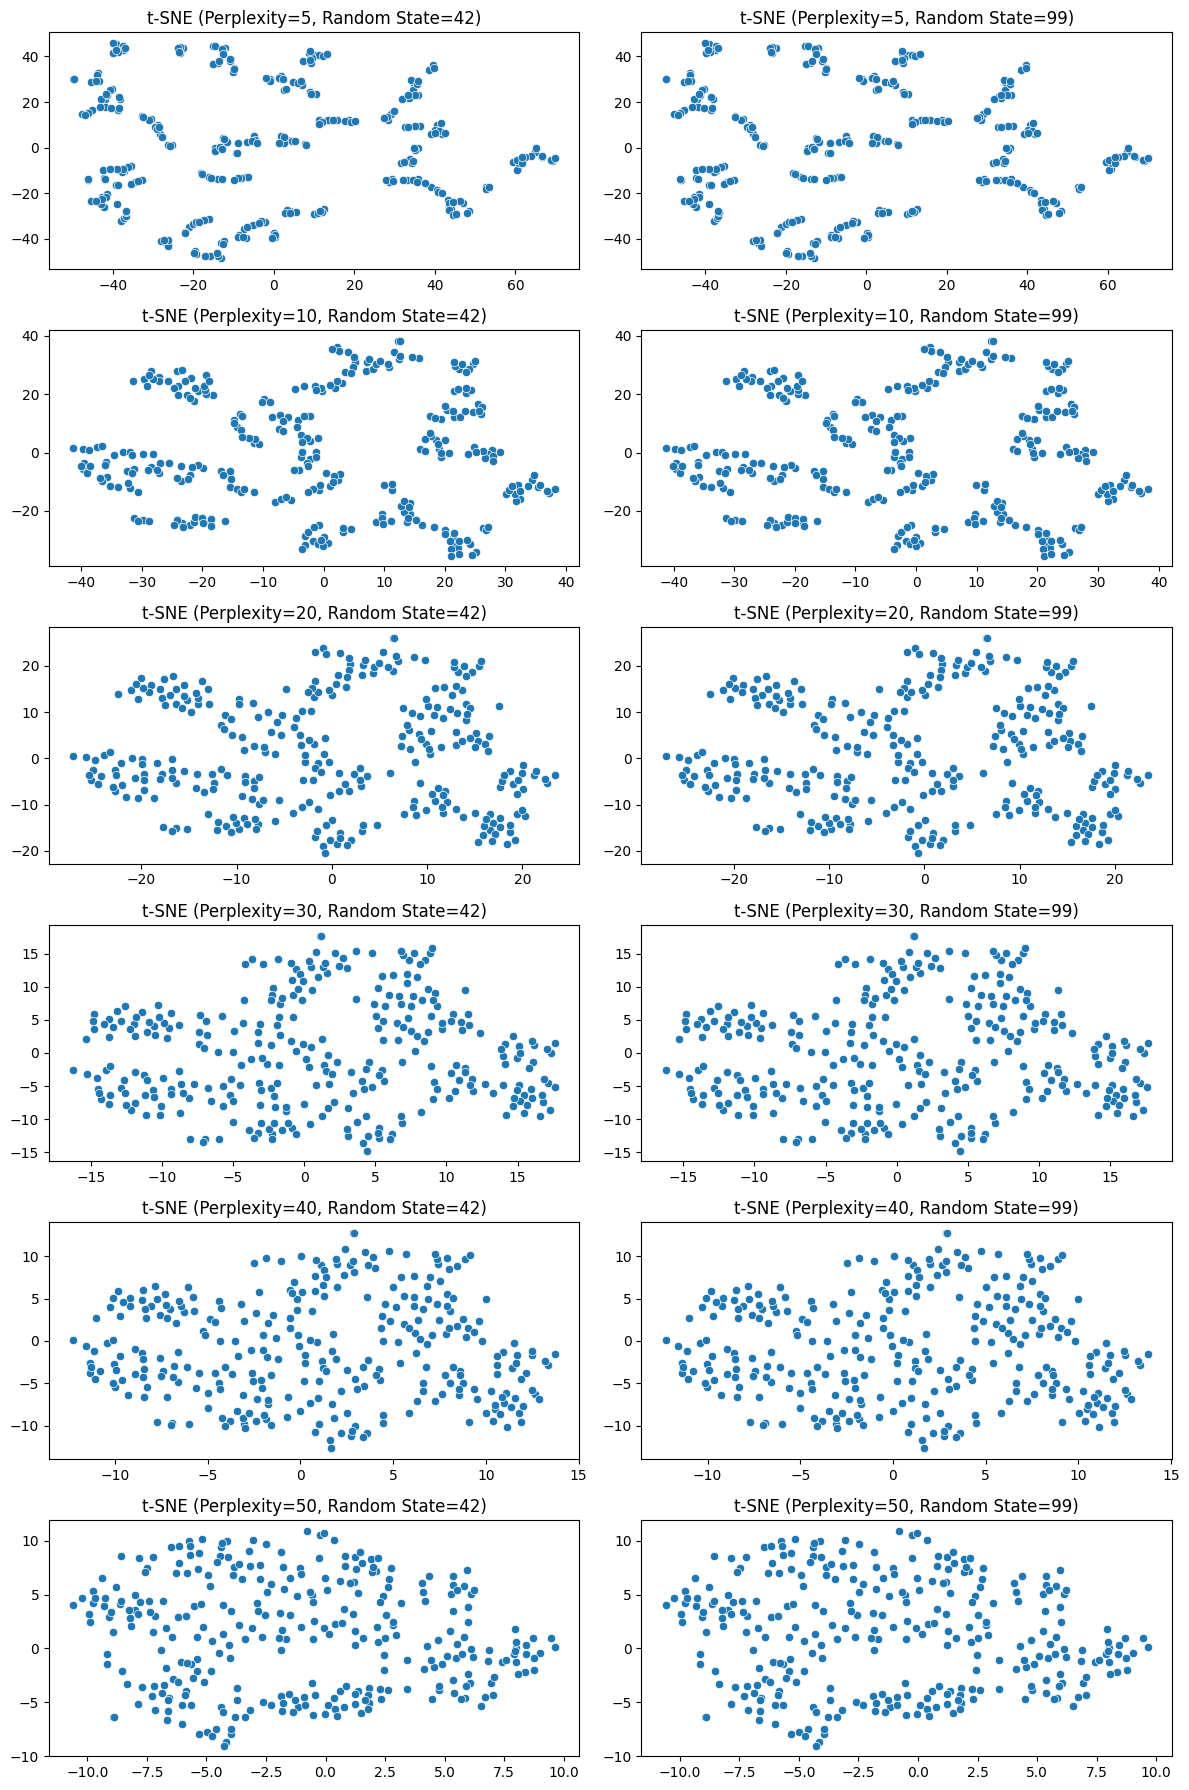

In [71]:
perplexities = [5, 10, 20, 30, 40, 50]
random_states = [42, 99]

fig, axes = plt.subplots(len(perplexities), len(random_states), figsize=(12, 18))

for i, perplexity in enumerate(perplexities):
    for j, random_state in enumerate(random_states):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
        tsne_results = tsne.fit_transform(scaled_data)

        ax = axes[i, j]
        sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], ax=ax)
        ax.set_title(f't-SNE (Perplexity={perplexity}, Random State={random_state})')

plt.tight_layout()
plt.show()

#### 2.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

1. no, the dataset does not show clear cluster structures  
2. not applicable, as no distinct clusters are visible  
3. no, the points appear spread out without a clear shape  
4. no, there is no strong separation between groups of points  
5. no, there is no strong evidence of subclusters in this dataset  

#### 2.2.3. Different t-SNE Plots

Plot your original dataset2_integer_x.csv data. Were your interpretations of the t-SNE plots for the continuous dataset from 2.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 2.2?
* If so, explain why you may have had different interpretation and/or seen different t-SNE plots.
* If not, explain why they may have been mostly the same.

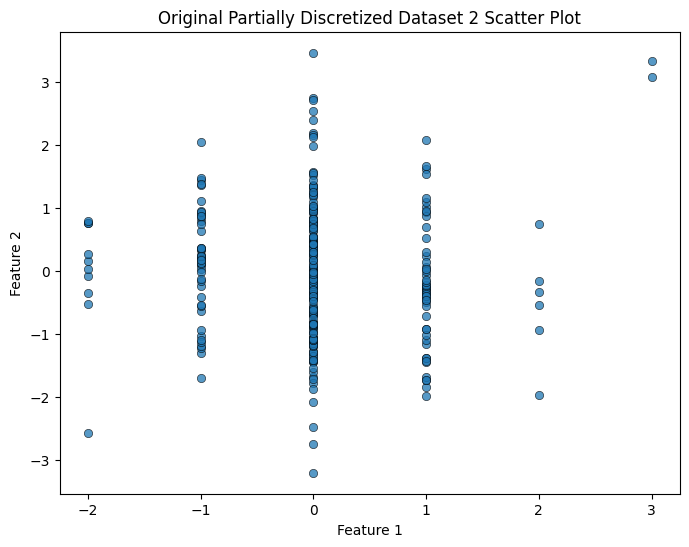

In [72]:

df_original = pd.read_csv("dataset2_integer_x.csv")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_original.iloc[:, 0], y=df_original.iloc[:, 1], alpha=0.75, edgecolor='k')
plt.title("Original Partially Discretized Dataset 2 Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


- same interpretation, both datasets showed no clear clusters  
- discretization caused vertical alignments, but overall structure remained similar  
- t-SNE results were mostly unchanged because the dataset lacks meaningful clustering  

## 3. Dataset 3



### 3.1. Continuous Dataset

#### 3.1.1 t-SNE Plots

First, read the dataset3.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

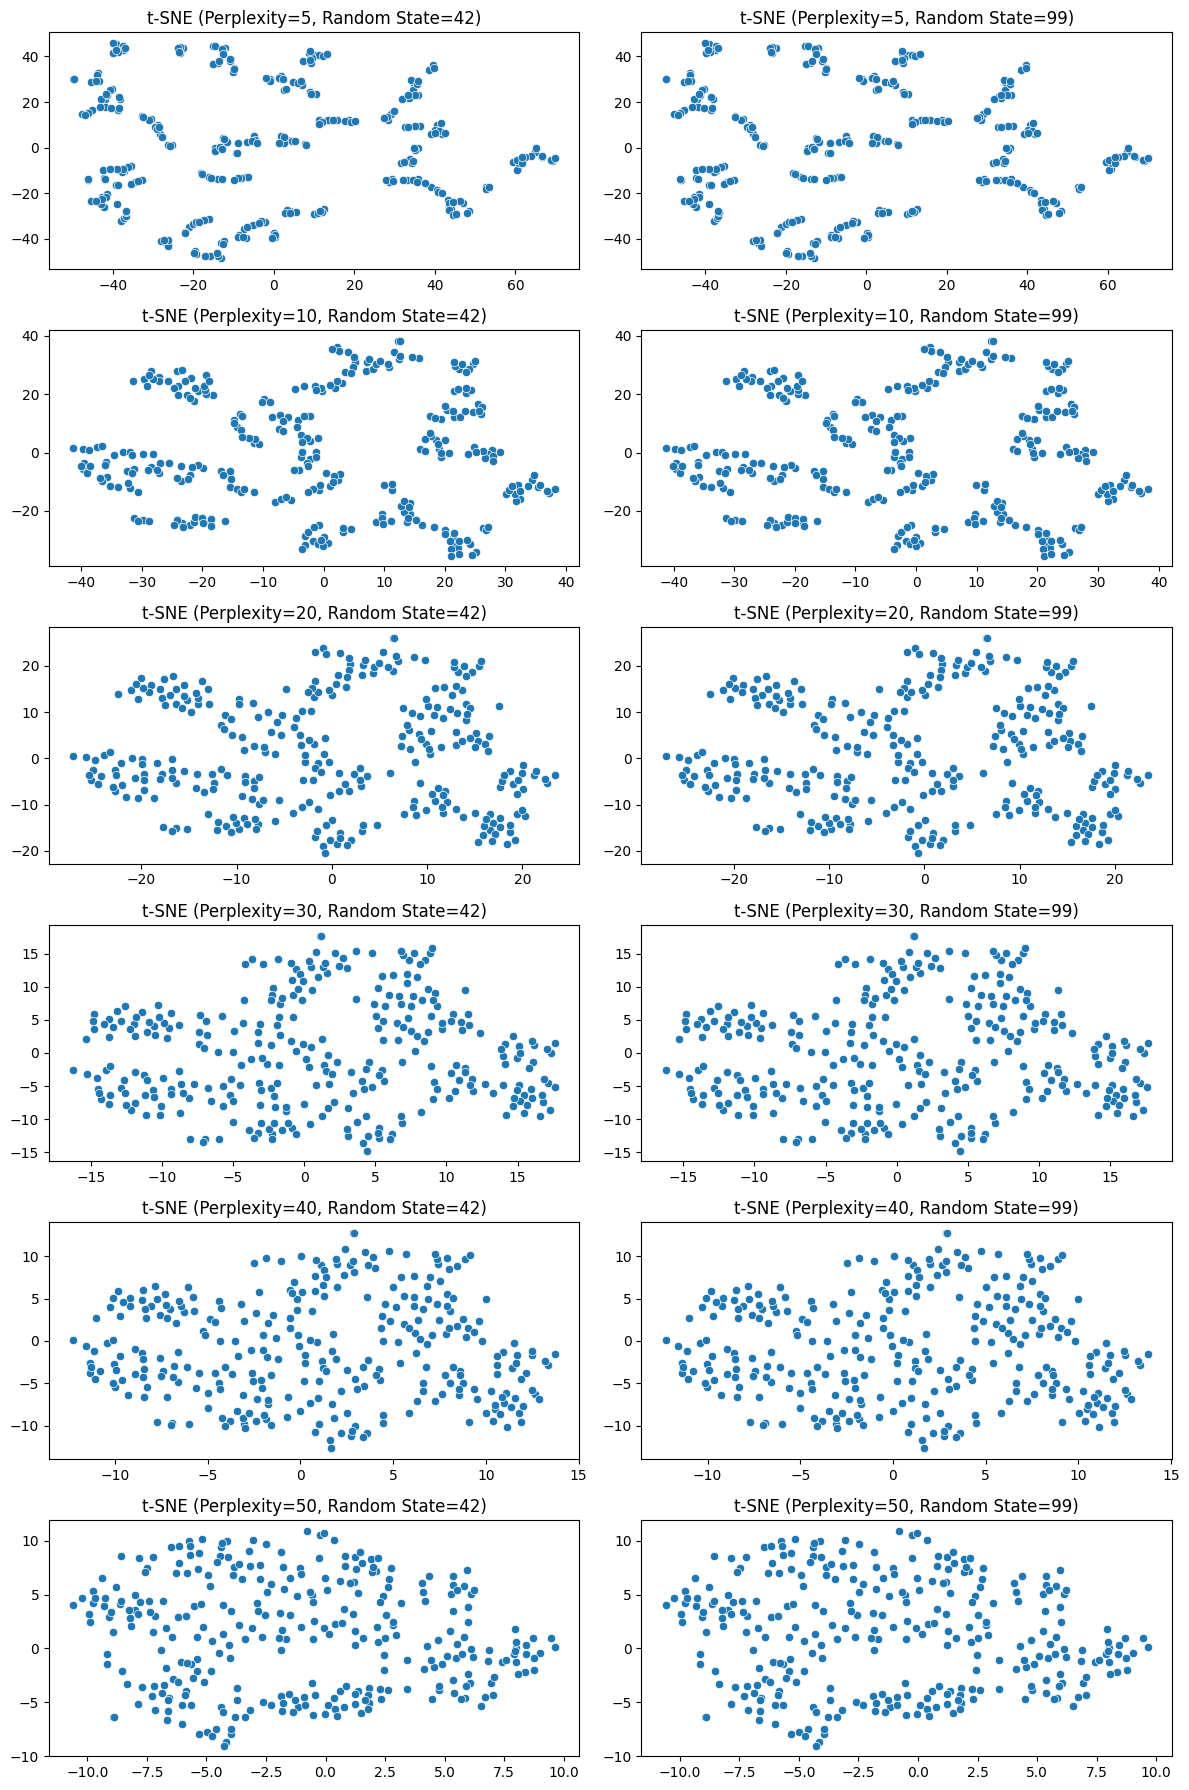

In [73]:
df = pd.read_csv("dataset3.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

perplexities = [5, 10, 20, 30, 40, 50]
random_states = [42, 99]

fig, axes = plt.subplots(len(perplexities), len(random_states), figsize=(12, 18))

for i, perplexity in enumerate(perplexities):
    for j, random_state in enumerate(random_states):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
        tsne_results = tsne.fit_transform(scaled_data)

        ax = axes[i, j]
        sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], ax=ax)
        ax.set_title(f't-SNE (Perplexity={perplexity}, Random State={random_state})')

plt.tight_layout()
plt.show()

#### 3.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

1. no, the dataset does not show clear cluster structures  
2. not applicable, as no distinct clusters are visible  
3. no, the points appear spread out without a clear shape  
4. no, there is no strong separation between groups of points  
5. no, there is no strong evidence of subclusters in this dataset  

#### 3.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset3 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

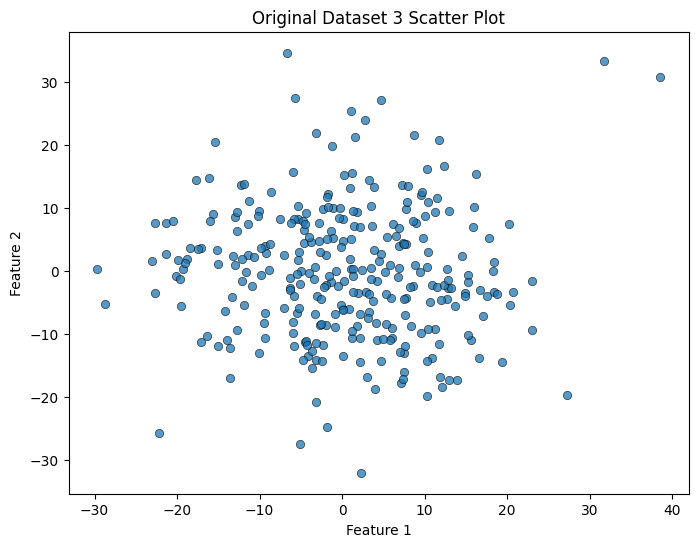

In [74]:

df_original = pd.read_csv("dataset3.csv")

# Plot the original dataset to corroborate t-SNE findings
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_original.iloc[:, 0], y=df_original.iloc[:, 1], alpha=0.75, edgecolor='k')
plt.title("Original Dataset 3 Scatter Plot")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


- clusterable - false, the original dataset confirms no clear clusters  
- number of clusters - not applicable, as no distinct groups exist  
- spherical clusters - true, points are spread without a structured shape  
- well-separated clusters - false, no visible separation between points  
- subclusters - false, no evidence of smaller structured groups  

why t-SNE might misinterpret this dataset  
- t-SNE forces structure where none exists, making artificial groupings  
- it distorts distances to emphasize variations, even when not meaningful  
- the original scatter plot confirms a uniform distribution with no clustering  



### 3.2. Partially Discretized Dataset

#### 3.2.1 t-SNE Plots

First, read the dataset3_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

#-------------------

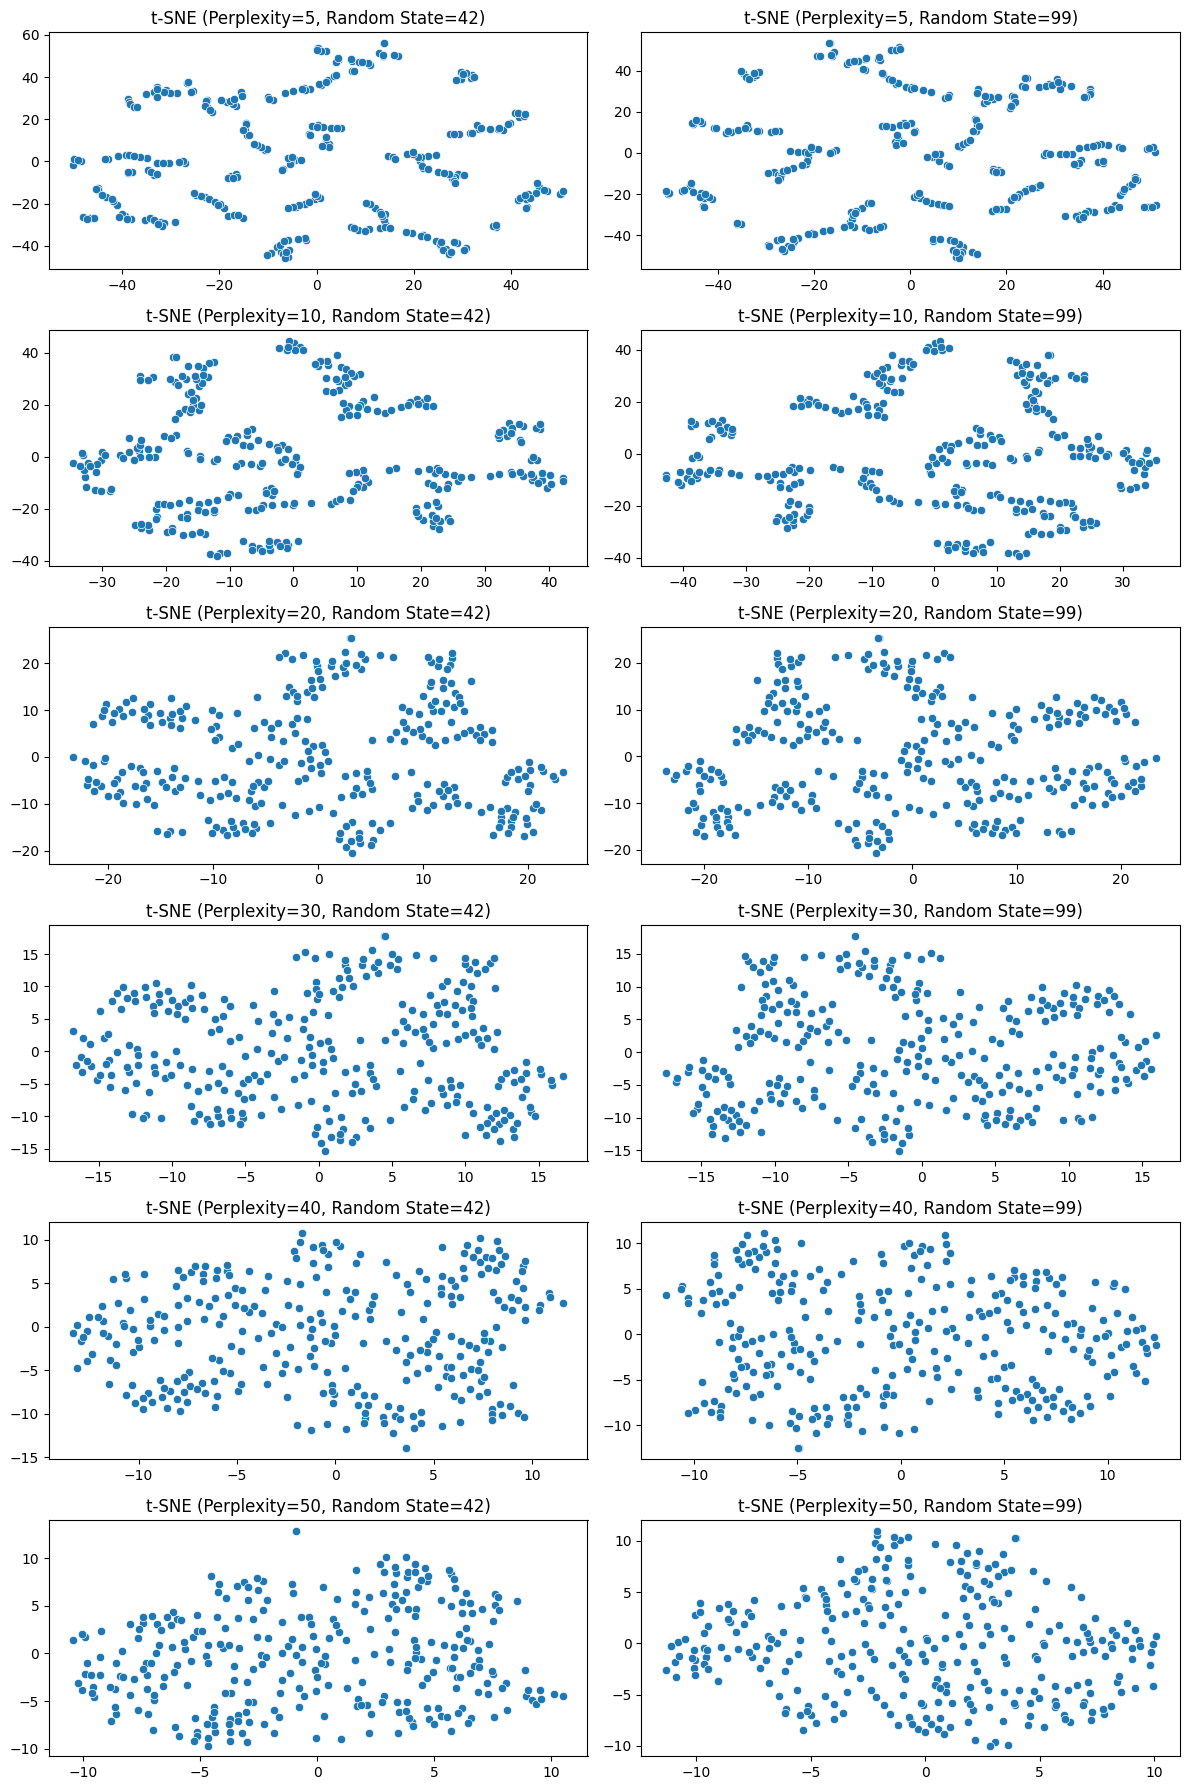

In [75]:
df = pd.read_csv("dataset3_integer_x.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

perplexities = [5, 10, 20, 30, 40, 50]
random_states = [42, 99]

fig, axes = plt.subplots(len(perplexities), len(random_states), figsize=(12, 18))

for i, perplexity in enumerate(perplexities):
    for j, random_state in enumerate(random_states):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
        tsne_results = tsne.fit_transform(scaled_data)

        ax = axes[i, j]
        sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], ax=ax)
        ax.set_title(f't-SNE (Perplexity={perplexity}, Random State={random_state})')

plt.tight_layout()
plt.show()

#### 3.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

1. clusterable - no, no distinct clusters visible  
2. number of clusters - not applicable, no clear groups  
3. spherical clusters - no, structures appear elongated  
4. well-separated clusters - no, data is continuously spread  
5. subclusters - no, no smaller structured groups observed  

#### 3.2.3. Different t-SNE Plots

Plot your original dataset3_integer_x.csv data. Were your interpretations of the t-SNE plots for the continuous dataset from 3.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 3.2?
* If so, explain why you may have had different interpretation and/or seen different t-SNE plots.
* If not, explain why they may have been mostly the same.

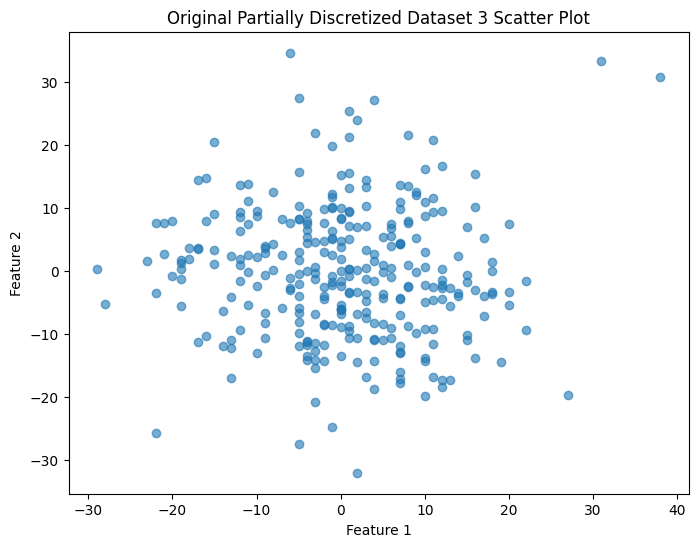

In [76]:
df = pd.read_csv("dataset3_integer_x.csv")

plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.6)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Partially Discretized Dataset 3 Scatter Plot")
plt.show()

- The interpretations are mostly the same because the overall distribution remains similar.  
- Discretization may have slightly altered local relationships, but the global structure is preserved.  
- The t-SNE plots still show no clear clustering structure, aligning with the original dataset’s scattered nature.

## 4. Dataset 4



### 4.1. Continuous Dataset

#### 4.1.1 t-SNE Plots

First, read the dataset4.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

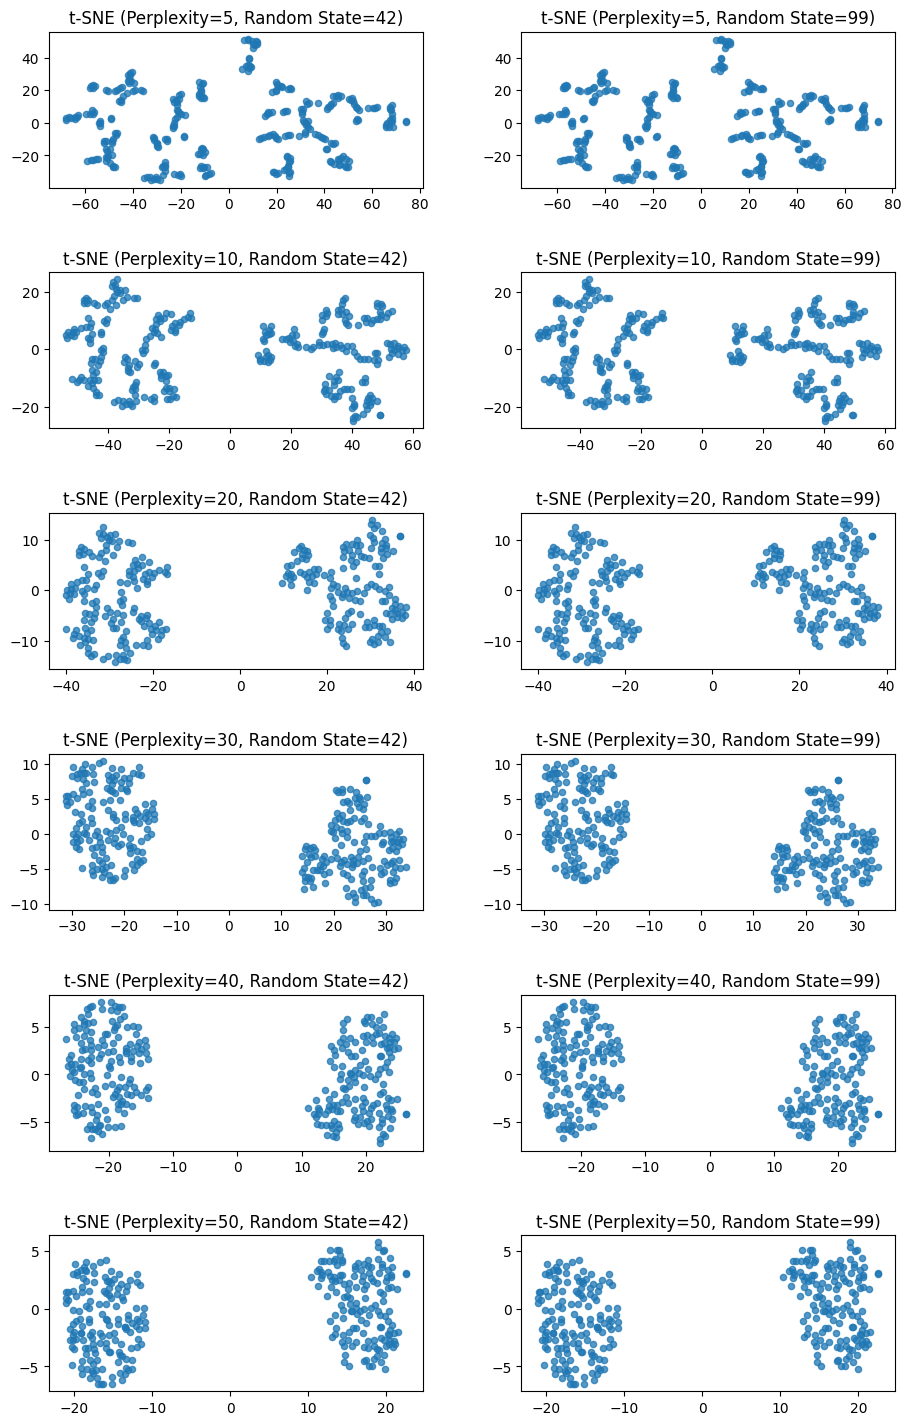

In [77]:
df = pd.read_csv("dataset4.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

perplexities = [5, 10, 20, 30, 40, 50]
random_states = [42, 99]

fig, axes = plt.subplots(len(perplexities), len(random_states), figsize=(10, 15))
fig.tight_layout(pad=4.0)

for i, perplexity in enumerate(perplexities):
    for j, random_state in enumerate(random_states):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
        tsne_results = tsne.fit_transform(scaled_data)

        ax = axes[i, j]
        ax.scatter(tsne_results[:, 0], tsne_results[:, 1], s=20, alpha=0.75)
        ax.set_title(f"t-SNE (Perplexity={perplexity}, Random State={random_state})")

plt.show()

#### 4.1.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

1. yes, distinct groups are visible  
2. two, clearly separated clusters appear  
3. no, clusters are elongated rather than spherical  
4. yes, clusters are well-separated with clear boundaries  
5. no, no strong evidence of subclusters within main clusters

#### 4.1.3. Corroborating

The purpose of this case study is to build intuition about how/why the t-SNE algorithm works the way that it does under different scenarios. Plot your original dataset4 data and confirm (or deny) which of your answers that you gave above were true or false. If an interpretation that you made from the t-SNE plot was wrong, explain why the t-SNE algorithm may not be as effective in interpreting the underlying clustering structure for this particular dataset.

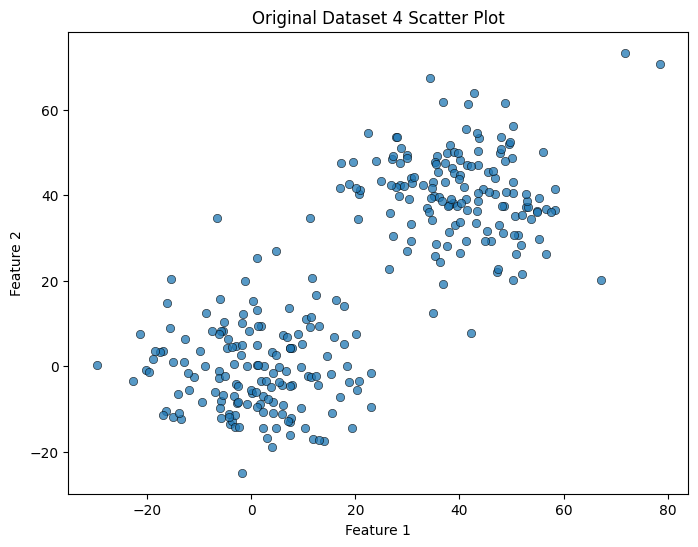

In [78]:

df = pd.read_csv("dataset4.csv")

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], alpha=0.75, edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Dataset 4 Scatter Plot")
plt.show()


- True, distinct groups are visible  
- False, two vaguely separated clusters appear  
- False, clusters are roughly spherical  
- False, clusters are well-separated with clear boundaries  
- True, no strong evidence of subclusters within main clusters



### 4.2. Partially Discretized Dataset

#### 4.2.1 t-SNE Plots


First, read the dataset4_integer_x.csv file into a dataframe. Then use 6 different perplexity values and at least two random states for each perplexity value two map this 2-d dataframe onto another two-dimensional dataset using the t-SNE algorithm. Show your projected coordinates in a scatterplot for each combination of random state and perplexity value.

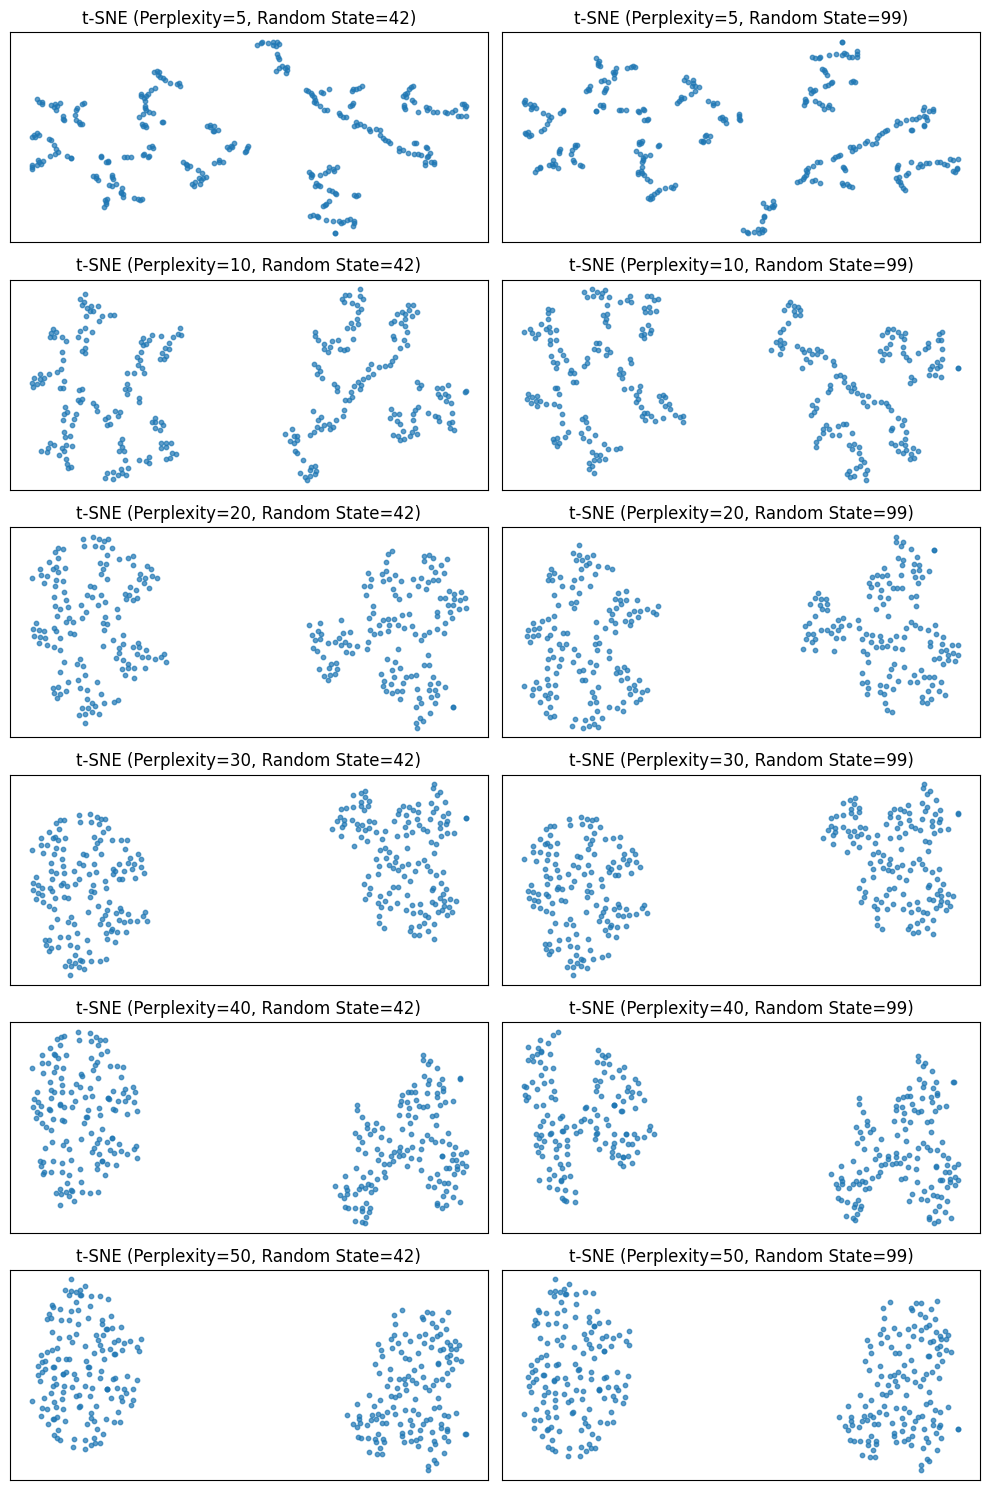

In [79]:
df = pd.read_csv("dataset4_integer_x.csv")

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

perplexities = [5, 10, 20, 30, 40, 50]
random_states = [42, 99]

fig, axes = plt.subplots(len(perplexities), len(random_states), figsize=(10, 15))
for i, perplexity in enumerate(perplexities):
    for j, random_state in enumerate(random_states):
        tsne = TSNE(n_components=2, perplexity=perplexity, random_state=random_state)
        tsne_results = tsne.fit_transform(scaled_data)

        ax = axes[i, j]
        ax.scatter(tsne_results[:, 0], tsne_results[:, 1], s=10, alpha=0.7)
        ax.set_title(f't-SNE (Perplexity={perplexity}, Random State={random_state})')
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()


#### 4.2.2. Interpretation

Use your t-SNE plots above to answer the following questions.

1. Is this dataset clusterable?
2. If so, how many clusters does the dataset have?
3. If so, are the clusters spherical?
4. If so, are the clusters well-separated?
5. If you have identified some "main clusters" from these plots, is there strong evidence that some of these "main clusters" may be comprised of some "subclusters"?

#-------------------

1. Yes, distinct groups are visible.  
2. Two, clearly separated clusters appear.  
3. No, clusters are elongated rather than spherical.  
4. Yes, clusters are well-separated with clear boundaries.  
5. No, no strong evidence of subclusters within main clusters.

#### 4.2.3. Different t-SNE Plots

Plot your original dataset4_integer_x.csv data. Were you interpretations of the t-SNE plots for the continuous datast from 4.1 different from your interpretation of the t-SNE plots for the partially discretized dataset from 4.2? If so, explain why you may have had different interpretation and/or seen different t-SNE plots.

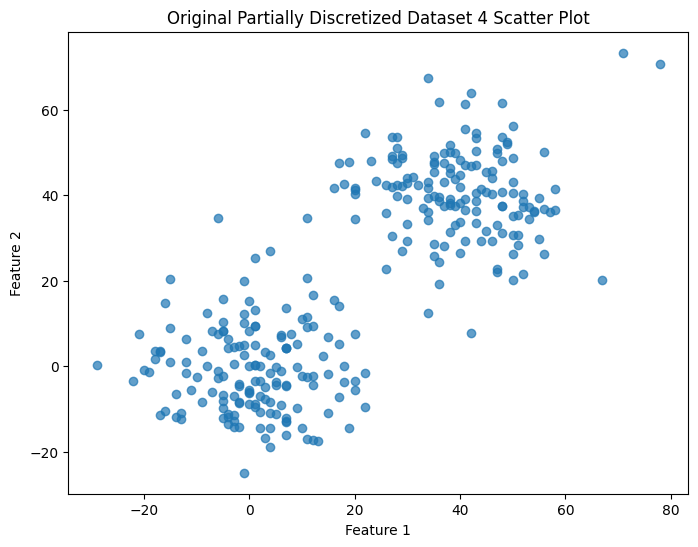

In [80]:
df = pd.read_csv("dataset4_integer_x.csv")

plt.figure(figsize=(8, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.7)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Partially Discretized Dataset 4 Scatter Plot")
plt.show()

- No, the interpretations remained mostly the same.  
- The clusters remained well-separated, indicating that the discretization of one feature did not significantly impact the overall structure.  
- The t-SNE plots in 4.2 showed similar clustering patterns to 4.1, confirming that the dataset retained its original separability.